**Auteur** : Viktoriya Zeruk<br>
**Date dernière version** : 18/05/2022<br>

---



<div style="display: flex; background: rgb(75,0,130);
background: linear-gradient(90deg, rgba(75,0,130,1) 47%, rgba(216,191,216,1) 89%, rgba(230,230,250,1) 100%);">
<h2 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Project 4 : Segmentez des clients d'un site e-commerce
 </br>  | Notebook 2 :  Modélisations  | <br>
 (KMeans, DBSCAN, AgglomerativeClustering)<br></h2> </div>    


<div style="display: flex; background: rgb(75,0,130);
background: linear-gradient(90deg, rgba(75,0,130,1) 47%, rgba(216,191,216,1) 89%, rgba(230,230,250,1) 100%);">
<h4 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center"> _______________________________________________________________________________________________</h4> 
</div>    

---

## Essais de différentes approches de modélisation
Méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.

In [183]:
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from zipfile import ZipFile
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\victo\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [184]:
from matplotlib.collections import LineCollection
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import cluster, metrics
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [185]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150
plt.style.use('ggplot') 
plt.rcParams.update(
    {
     'figure.figsize': (15, 10),
     'axes.labelsize': 15,
     'axes.titlesize':25,
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [186]:
olistbr = pd.read_csv('dataset/olist_clean_modeling.csv', delimiter=';').set_index('customer_unique_id')
olistbr

average_basket  max_order_amount  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2          129.90            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           18.90             18.90   
0000f46a3911fa3c0805444483337064           69.00             69.00   
0000f6ccb0745a6a4b88665a16c9f078           25.99             25.99   
0004aac84e0df4da2b147fca70cf8255          180.00            180.00   
...                                          ...               ...   
fffcf5a5ff07b0908bd4e2dbc735a684          785.00            890.00   
fffea47cd6d3cc0a88bd621562a9d061           64.89             64.89   
ffff371b4d645b6ecea244b27531430a           89.90             89.90   
ffff5962728ec6157033ef9805bacc48          115.00            115.00   
ffffd2657e2aad2907e67c3e9daecbeb           56.99             56.99   

                                  min_order_amount  \
customer_unique_id                                   
0000366f3b9a7992bf8c76cfdf3221e2            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f             18.90   
0000f46a3911fa3c0805444483337064             69.00   
0000f6ccb0745a6a4b88665a16c9f078             25.99   
0004aac84e0df4da2b147fca70cf8255            180.00   
...                                            ...   
fffcf5a5ff07b0908bd4e2dbc735a684            890.00   
fffea47cd6d3cc0a88bd621562a9d061             64.89   
ffff371b4d645b6ecea244b27531430a             89.90   
ffff5962728ec6157033ef9805bacc48            115.00   
ffffd2657e2aad2907e67c3e9daecbeb             56.99   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           1.0   
0000f46a3911fa3c0805444483337064                           1.0   
0000f6ccb0745a6a4b88665a16c9f078                           1.0   
0004aac84e0df4da2b147fca70cf8255                           1.0   
...                                                        ...   
fffcf5a5ff07b0908bd4e2dbc735a684                           1.0   
fffea47cd6d3cc0a88bd621562a9d061                           1.0   
ffff371b4d645b6ecea244b27531430a                           1.0   
ffff5962728ec6157033ef9805bacc48                           1.0   
ffffd2657e2aad2907e67c3e9daecbeb                           1.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      0.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      0.0   
...                                                   ...   
fffcf5a5ff07b0908bd4e2dbc735a684                      0.0   
fffea47cd6d3cc0a88bd621562a9d061                      0.0   
ffff371b4d645b6ecea244b27531430a                      0.0   
ffff5962728ec6157033ef9805bacc48                      0.0   
ffffd2657e2aad2907e67c3e9daecbeb                      0.0   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                    0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0.0   
0000f46a3911fa3c0805444483337064                    1.0   
0000f6ccb0745a6a4b88665a16c9f078                    0.0   
0004aac84e0df4da2b147fca70cf8255                    0.0   
...                                                 ...   
fffcf5a5ff07b0908bd4e2dbc735a684                    0.0   
fffea47cd6d3cc0a88bd621562a9d061                    1.0   
ffff371b4d645b6ecea244b27531430a                    0.0   
ffff5962728ec6157033ef9805bacc48                    0.0   
ffffd2657e2aad2907e67c3e9daecbeb                    1.0   


In [187]:
olistbr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91424 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   average_basket                91424 non-null  float64
 1   max_order_amount              91424 non-null  float64
 2   min_order_amount              91424 non-null  float64
 3   number_of_products_purchased  91424 non-null  float64
 4   bucket_quartile_lower25       91424 non-null  float64
 5   bucket_quartile_25_50         91424 non-null  float64
 6   bucket_quartile_50_75         91424 non-null  float64
 7   bucket_quartile_upper75       91424 non-null  float64
 8   payment_boleto                91424 non-null  float64
 9   payment_credit_card           91424 non-null  float64
 10  payment_debit_card            91424 non-null  float64
 11  payment_voucher               91424 non-null  float64
 12  applian

In [188]:
olistbr.describe()

average_basket  max_order_amount  min_order_amount  \
count    91424.000000      91424.000000      91424.000000   
mean       125.740516        125.852785        125.852785   
std        188.792062        189.494976        189.494976   
min          0.850000          0.850000          0.850000   
25%         42.900000         41.990000         41.990000   
50%         79.000000         79.000000         79.000000   
75%        139.900000        139.900000        139.900000   
max       6735.000000       6735.000000       6735.000000   

       number_of_products_purchased  bucket_quartile_lower25  \
count                       91424.0             91424.000000   
mean                            1.0                 0.249945   
std                             0.0                 0.432983   
min                             1.0                 0.000000   
25%                             1.0                 0.000000   
50%                             1.0                 0.000000   
75%                             1.0                 0.000000   
max                             1.0                 1.000000   

       bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
count           91424.000000           91424.000000             91424.000000   
mean                0.251334               0.249333                 0.249333   
std                 0.433783               0.432629                 0.432629   
min                 0.000000               0.000000                 0.000000   
25%                 0.000000               0.000000                 0.000000   
50%                 0.000000               0.000000                 0.000000   
75%                 1.000000               0.000000                 0.000000   
max                 1.000000               1.000000                 1.000000   

       payment_boleto  payment_credit_card  payment_debit_card  \
count    91424.000000         91424.000000        91424.000000   
mean         0.199171             0.773254            0.015423   
std          0.399379             0.425724            0.123316   
min          0.000000             0.000000            0.000000   
25%          0.000000             1.000000            0.000000   
50%          0.000000             1.000000            0.000000   
75%          0.000000             1.000000            0.000000   
max          1.000000             2.000000            2.000000   

       payment_voucher   appliances          auto  construction       culture  \
count     91424.000000  91424.00000  91424.000000  91424.000000  91424.000000   
mean          0.055839      8.07899      5.712949      3.630764      1.139780   
std           0.400195     66.20054     51.590608     42.374365     26.202375   
min           0.000000      0.00000      0.000000      0.000000      0.000000   
25%           0.000000      0.00000      0.000000      0.000000      0.000000   
50%           0.000000      0.00000      0.000000      0.000000      0.000000   
75%           0.000000      0.00000      0.000000      0.000000      0.000000   
max          25.000000   6735.00000   2258.000000   3099.900000   6499.000000   

        electronics       fashion          food        garden  health_beauty  \
count  91424.000000  91424.000000  91424.000000  91424.000000   91424.000000   
mean      17.097275     13.883474      0.579304      4.439569      20.458954   
std       92.088308     80.848686      8.177808     48.251371      84.848920   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      0.000000      0.000000       0.000000   
75%        0.000000      0.000000      0.000000      0.000000       0.000000   
max     4590.000000   3999.900000    699.900000   3930.000000    3899.000000   

            hobbies          home        office        others         pets  \
count  91424.000000  91424.000000  

# Modélisations

### Normalisation et encodage des données
L'échantillon est composé de plusieurs variables avec des différences d'échelle. Il est donc nécessaire de traiter ces écarts pour ne pas biaiser les modélisations. 

In [189]:
X = olistbr.copy()

categorical_columns = X.select_dtypes('object').columns
numerical_columns = X.drop(columns=categorical_columns).columns

scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

encoder = OneHotEncoder(sparse=False)
X_categorical = encoder.fit_transform(X[categorical_columns])
X = pd.merge(X[numerical_columns], 
             pd.DataFrame(data = X_categorical, 
                          columns = encoder.get_feature_names(['state'])).set_index(X.index),
                          left_index = True, right_index = True, how='left')
X.drop_duplicates(inplace=True)

X.name = "X"
X.shape

c:\Python3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(90962, 39)

### Échantillon d'essai
Afin d'optimiser les temps de calcul des différentes pistes de modélisation, un échantillon de 10000 individus sera pris comme population test. La méthode .sample() permet une sélection au hasard des individus…


In [190]:
X_sample = X.copy()
X_sample = X_sample.sample(n=10000)
X_sample.name = "X_sample"
X_sample.shape

(10000, 39)

In [191]:
display(X_sample.duplicated().sum().sum())
display(X_sample.isna().sum().sum())

0

0

### Décomposition PCA
L'ACP (*Analyse en Composantes Principales*) permettra une visualisation plus simple des clusters sur le premier plan factoriel (ou plus).

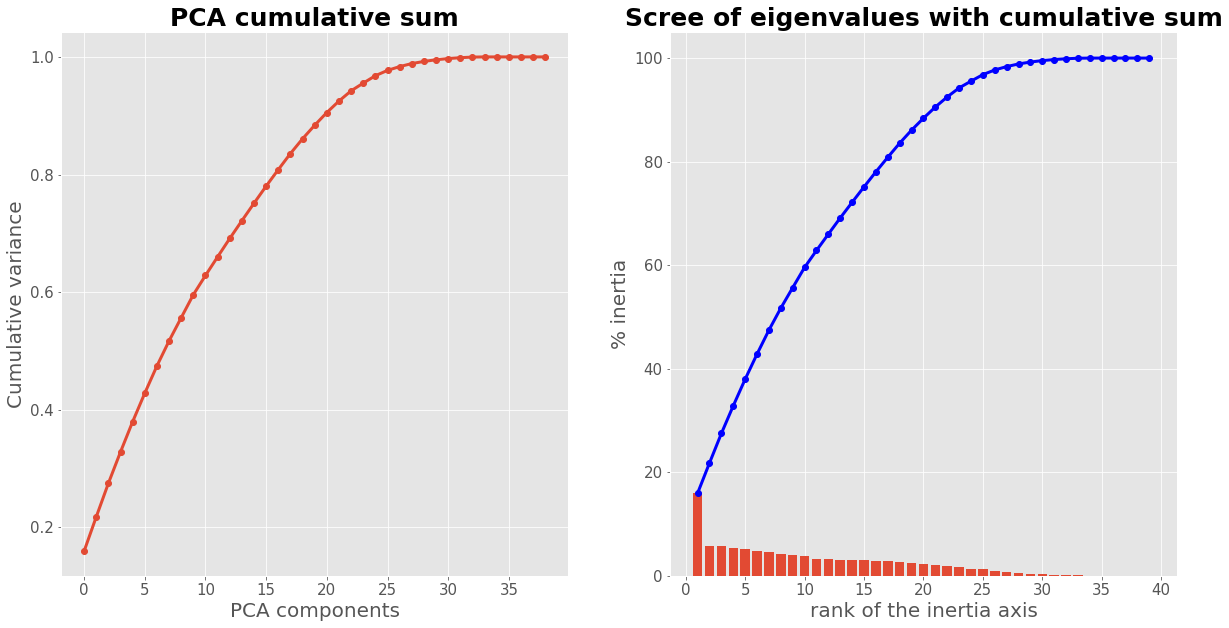

In [192]:
def pca_eigenvalues(X):
    '''PCA plot and scree of eigenvalues with cumulative sum.'''
    pca = PCA(svd_solver='full').fit(X)

    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.plot(list(range(X.shape[1])), pca.explained_variance_ratio_.cumsum(),marker='o', linewidth=3)
    plt.xlabel('PCA components', fontsize=20)
    plt.ylabel('Cumulative variance', fontsize=20)
    plt.title('PCA cumulative sum', fontsize=25)

    plt.subplot(122)
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="blue",marker='o', linewidth=3)  
    plt.xlabel('rank of the inertia axis', fontsize=20)
    plt.ylabel('% inertia', fontsize=20)
    plt.title("Scree of eigenvalues with cumulative sum", fontsize=25)
    plt.show()
    
pca_eigenvalues(X_sample)

In [193]:
pca = PCA(n_components=20).fit(X_sample)
pca.explained_variance_ratio_.cumsum()

array([0.15960839, 0.21792293, 0.27498743, 0.32841773, 0.37977911,
       0.4282922 , 0.47454972, 0.51710021, 0.55656777, 0.59569118,
       0.62834604, 0.66000684, 0.69127132, 0.72145596, 0.75120355,
       0.78033218, 0.80836977, 0.83568927, 0.86079679, 0.88381774])

Le premier plan factoriel permet d'expliquer près de 28% de la variance. On peut expliquer 90% de la variance en prenant en compte 20 composantes. Notons que si n_components > 27, la variance ne progresse plus, les 100% sont atteint.

In [194]:
def eigenvalues_variance(X):
    '''eigenvalues, explained variances and cumulative explained variance.'''
    
    pca = PCA(svd_solver='full').fit(X)
    
    eig = pd.DataFrame(
        {
            "axe" : ["F" + str(x + 1) for x in range(shape(X)[1])], 
            "eigenvalues" : pca.explained_variance_,
            "%explained_variance" : np.round(pca.explained_variance_ratio_ * 100),
            "%cumulative_explained_variance" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
        },
        columns = ["axe", "eigenvalues", "%explained_variance", "%cumulative_explained_variance"])
    return eig

eigenvalues_variance(X_sample)

axe   eigenvalues  %explained_variance  %cumulative_explained_variance
0    F1  5.408842e+00                 16.0                            16.0
1    F2  1.976175e+00                  6.0                            22.0
2    F3  1.933814e+00                  6.0                            27.0
3    F4  1.810657e+00                  5.0                            33.0
4    F5  1.740545e+00                  5.0                            38.0
5    F6  1.644022e+00                  5.0                            43.0
6    F7  1.567585e+00                  5.0                            47.0
7    F8  1.441960e+00                  4.0                            52.0
8    F9  1.337485e+00                  4.0                            56.0
9   F10  1.325822e+00                  4.0                            60.0
10  F11  1.106615e+00                  3.0                            63.0
11  F12  1.072928e+00                  3.0                            66.0
12  F13  1.059497e+00                  3.0                            69.0
13  F14  1.022903e+00                  3.0                            72.0
14  F15  1.008093e+00                  3.0                            75.0
15  F16  9.871171e-01                  3.0                            78.0
16  F17  9.501438e-01                  3.0                            81.0
17  F18  9.258089e-01                  3.0                            84.0
18  F19  8.508487e-01                  3.0                            86.0
19  F20  7.801387e-01                  2.0                            88.0
20  F21  7.329703e-01                  2.0                            91.0
21  F22  6.608064e-01                  2.0                            92.0
22  F23  5.897768e-01                  2.0                            94.0
23  F24  4.436354e-01                  1.0                            96.0
24  F25  4.270755e-01                  1.0                            97.0
25  F26  3.063619e-01                  1.0                            98.0
26  F27  2.189781e-01                  1.0                            98.0
27  F28  1.737186e-01                  1.0                            99.0
28  F29  1.235490e-01                  0.0                            99.0
29  F30  9.582970e-02                  0.0                           100.0
30  F31  6.781132e-02                  0.0                           100.0
31  F32  5.214846e-02                  0.0                           100.0
32  F33  3.462428e-02                  0.0                           100.0
33  F34  9.922825e-03                  0.0                           100.0
34  F35  5.774710e-30                  0.0                           100.0
35  F36  3.030509e-30                  0.0                           100.0
36  F37  5.131951e-31                  0.0                           100.0
37  F38  4.198799e-32                  0.0                           100.0
38  F39  3.978673e-32                  0.0                           100.0

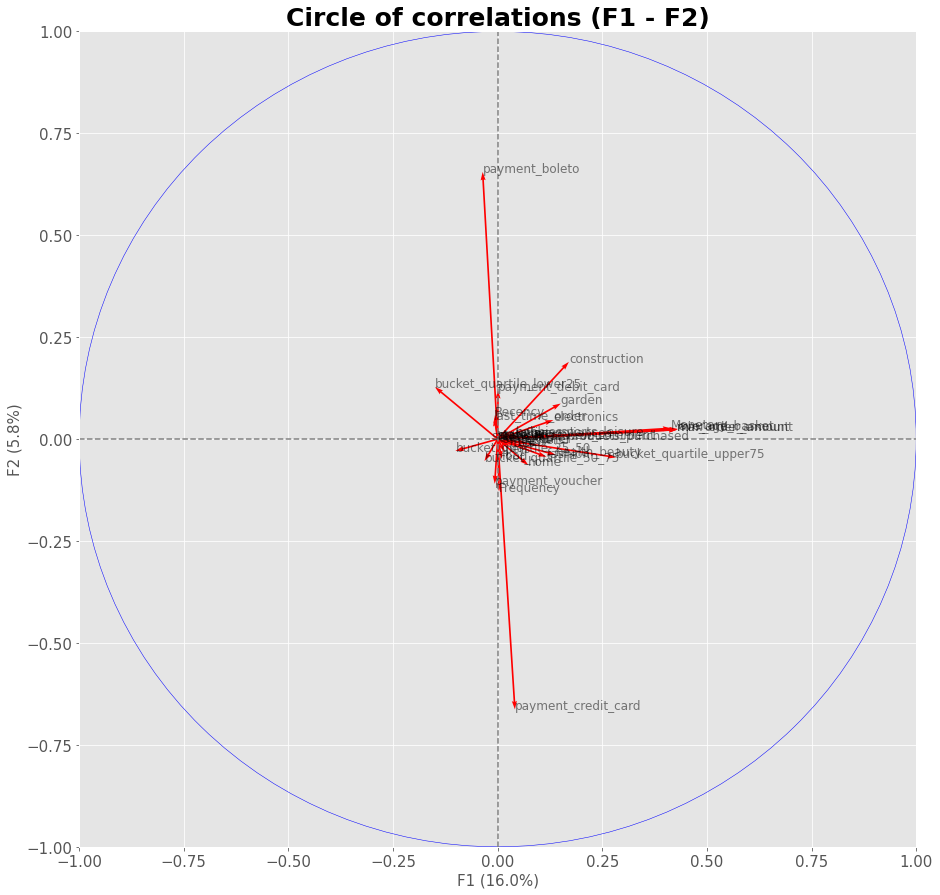

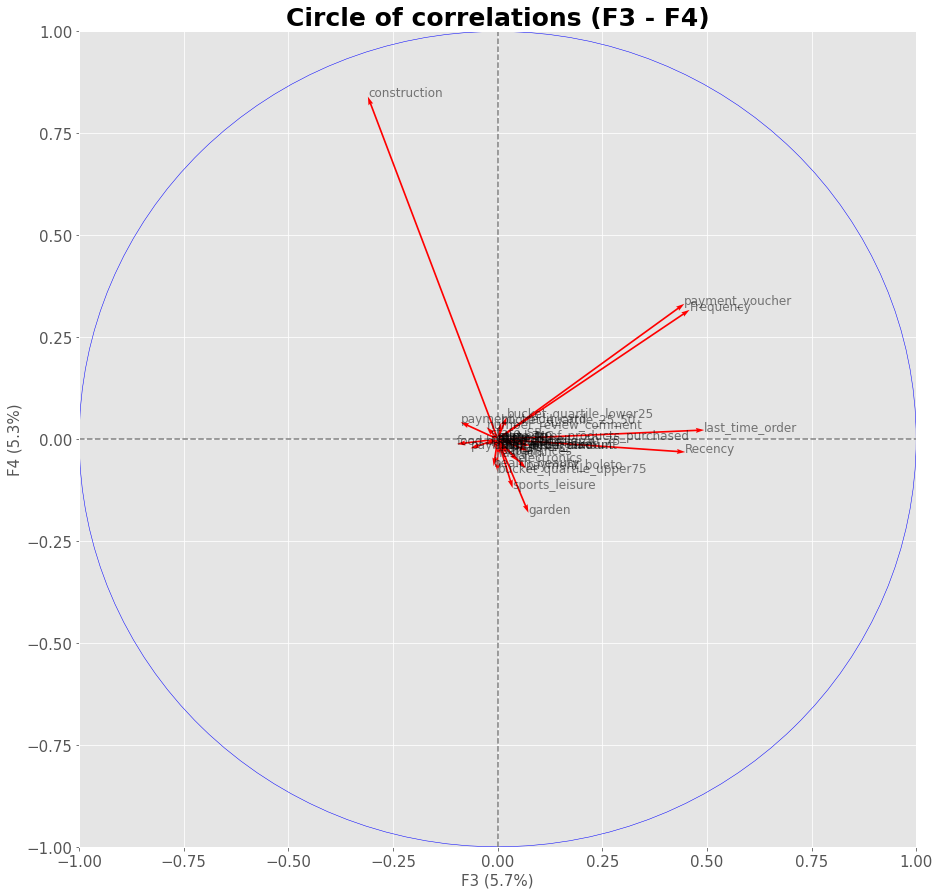

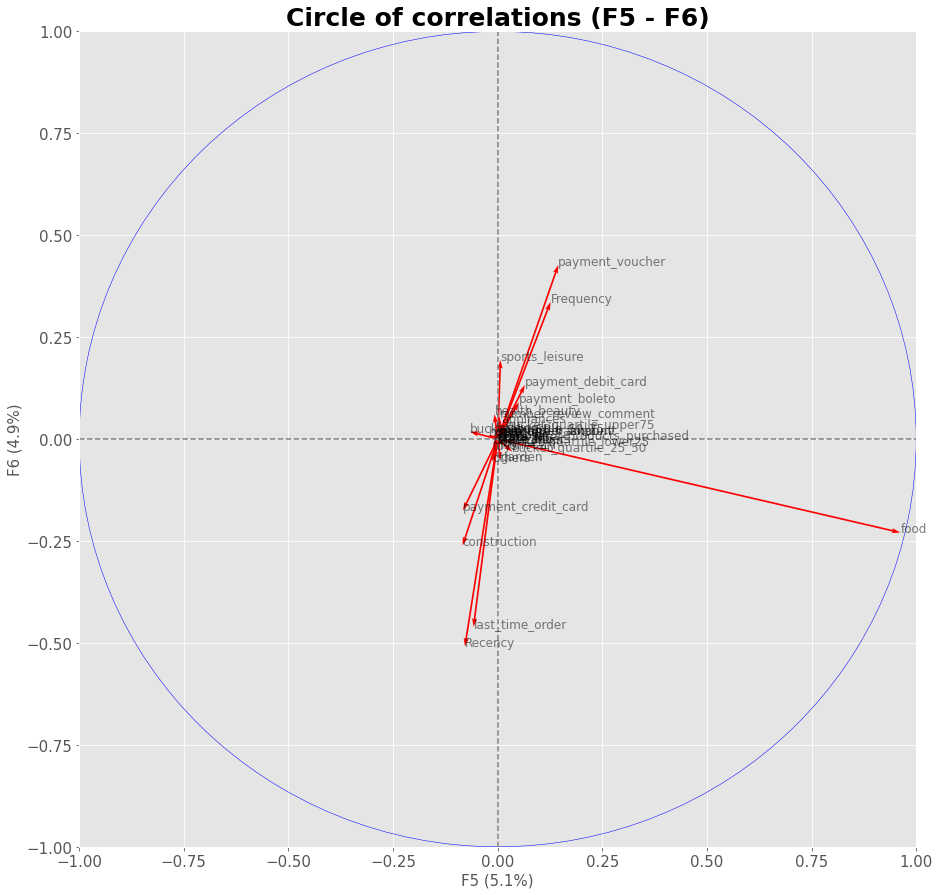

In [195]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    '''Circles of correlations with several factorial plans.'''

    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            fig, ax = plt.subplots(figsize=(15,15))

            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 45 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            if pcs.shape[1] < 45 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="r", width=0.002)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='12', rotation=label_rotation, color="black", alpha=0.5)
            
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

        
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Circle of correlations (F{} - F{})".format(d1+1, d2+1))
        plt.show(block=False)

display_circles(pcs=pca.components_, n_comp=6, pca=pca, axis_ranks=[(0,1),(2,3),(4,5)], 
                labels=X_sample.columns, label_rotation=0, lims=None)

Ici l'utilité d'une projection sur les premiers plans factoriels n'est pas source d'information. Un grand nombre de features sont plus ou moins représentés selon les composantes. Par exemple, sur F6 les clients dont l'intérêt est particulièrement porté sur des produits de beauté du corps sont très bien représentés. Seulement cet axe n'explique que 4% de la variance, on pourrait l'assimiler à une niche de clients.

Mais ici dans le contexte métier, le grand nombre de features ne rend pas l'expression faite par les cercles des corrélations explicite, l'utilité de l'ACP reste néanmoins essentielle pour la phase de réduction dimensionnelle.

**Les essais des différentes approches de modélisation seront exploités sur les algorithmes du Kmeans, AgglomerativeClustering et DBSCAN.**

# Modélisation Kmeans
Il est impératif de déterminer le k optimal, le but étant de pouvoir identifier le nombre de clusters le plus adapté aux données de l'échantillon.

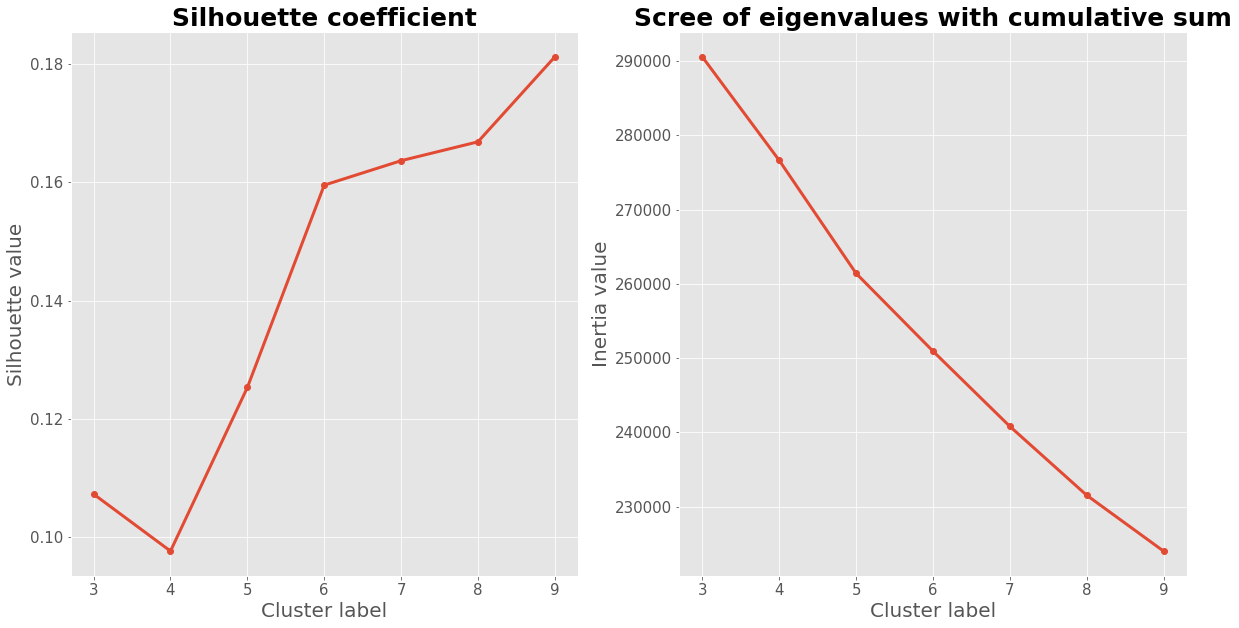

Time: 25.416 seconds


In [196]:
def silhouette_inertia(X):
    '''Silhouette coefficient and Inertia values plots. Manage clusters labels…'''
    
    start_time = time.time()
    plt.figure(figsize=(20,10))
    silhouettes = [] 
    inerties=[]

    plt.subplot(121)
    for k in range(3,10): 
        km = KMeans(n_clusters=k)  
        km.fit(X)
        silh = metrics.silhouette_score(X, km.labels_)
        silhouettes.append(silh) 
    plt.plot(range(3,10), silhouettes, marker='o', linewidth=3)
    plt.xlabel('Cluster label', fontsize=20)
    plt.ylabel('Silhouette value', fontsize=20)
    plt.title("Silhouette coefficient", fontsize=25)

    plt.subplot(122)
    for k in range(3,10):
        km = KMeans(n_clusters=k)
        km.fit(X)
        inerties.append(km.inertia_)
    plt.plot(range(3,10), inerties, marker='o', linewidth=3)
    plt.xlabel('Cluster label', fontsize=20)
    plt.ylabel('Inertia value', fontsize=20)
    plt.title("Scree of eigenvalues with cumulative sum", fontsize=25)
    
    plt.show()
    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    
silhouette_inertia(X_sample)

Le nombre de cluster optimal est estimé à k=3, la silhouette est supérieur à 0.22, mais un clustering en k=4 peut également être intéressant. L'interprétabilité business peut en effet s'avérer plus facile et plus détaillée en 4 clusters plutôt que 3, il est donc utile d'estimer les deux.

### Quelques fonctions utiles à l'analyse…

In [197]:
def kmeans_model(X, k, folder):
    '''Kmeans Model and save in folder.'''
    start_time = time.time()
    model_kms = KMeans(n_clusters=k)  
    model_kms.fit(X)
    
    filename = str(model_kms).split('(')[0]
    pickle.dump(model_kms, open(folder + filename + str(k) + '_' + str(X.name) + '.pkl', 'wb'))
    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    
    return model_kms.fit(X)

In [198]:
def kmeans_clustering_pca(X, k, get_model, get_folder, add_title):
    '''Projection Kmeans Model on the first factorial plane with percentage distribution clusters.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))
    
    start_time = time.time()
    pca = PCA(svd_solver = 'full').fit(X)
    X_projected = pca.transform(X)

    plt.figure(figsize=(20, 10))
    sns.scatterplot(X_projected[:,0], X_projected[:,1], 
                    hue = model_kms.labels_,
                    palette = 'Set1',
                    s=100, alpha=0.2).set_title('PCA - KMeans Clusters('+ str(k) +') ' + add_title, fontsize=30)
    
    ax, fig = plt.subplots(figsize=(20,6)) 
    clusters = pd.DataFrame(model_kms.labels_, columns=['cluster'])
    ax = sns.countplot(data=clusters, y='cluster', palette = 'Set1', alpha=.8, 
                       order=clusters['cluster'].value_counts(sort=False).index, orient='h')

    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(clusters))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)

    ax.set_title('Kmeans Clusters('+ str(k) +') ' + add_title)
    
    
    print("KMeans Silhouette Score: {}".format(round(metrics.silhouette_score(X_projected, 
                                               model_kms.labels_, metric='euclidean'), 3)))
    print("Time pca plot: {} seconds".format(round(time.time() - start_time, 3)))
    
    show()

In [199]:
def kmeans_clustering_tsne(X, k, get_model, get_folder, add_title):
    '''Cluster visualization on T-sne.'''
    start_time = time.time()
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))
    plt.figure(figsize=(12,12))
    sns.scatterplot(T[:,0], T[:,1], hue = model_kms.labels_, palette = 'Set1')
    plt.title('TSNE - KMeans Clusters('+ str(k) +') ' + add_title, fontsize=20)
    show()
    
    print("Time TSNE plot: {} seconds".format(round(time.time() - start_time, 3)))

In [200]:
def centroids_cls(X, get_model, get_folder):
    '''Centroid approach according to feature / cluster.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))

    idk = np.argsort(model_kms.labels_)

    X_cls = pd.DataFrame(X.index[idk], model_kms.labels_[idk]).reset_index()
    X_cls = X_cls.rename(columns={'index':'cluster'})
    X_cls = pd.merge(X, X_cls, on='customer_unique_id').set_index('customer_unique_id')
    
    centroids = model_kms.cluster_centers_
    centroids = pd.DataFrame(centroids, columns=X.columns)
    
    return X_cls, centroids

In [201]:
def data_cls(X, get_model, get_folder):
    '''Integration of cluster identifiers.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))

    idk = np.argsort(model_kms.labels_)

    X_cls = pd.DataFrame(X.index[idk], model_kms.labels_[idk]).reset_index()
    X_cls = X_cls.rename(columns={'index':'cluster'})
    X_cls = pd.merge(X, X_cls, left_index=True, right_on='customer_unique_id').set_index('customer_unique_id')
    
    return X_cls

In [202]:
def features_kmeans(X, view_features, get_model, get_folder):
    '''Visualization of some features.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))
    X_centroids = centroids_cls(X, get_model, get_folder)[0]
    plt.figure(figsize=(20, 100))
    i=1
    for var in X.columns : 
        if var in view_features:
            plt.subplot(20,2,i)
            sns.boxplot(data=X_centroids, x='cluster', y=var, palette="Set1", saturation=.8)
            plt.title(var)
            plt.ylabel('')
            plt.tight_layout()
            i+=1
    show()

In [203]:
kmeans_model(X=X_sample, k=3, folder='model/')

Time: 0.215 seconds


KMeans(n_clusters=3)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.107
Time pca plot: 3.339 seconds


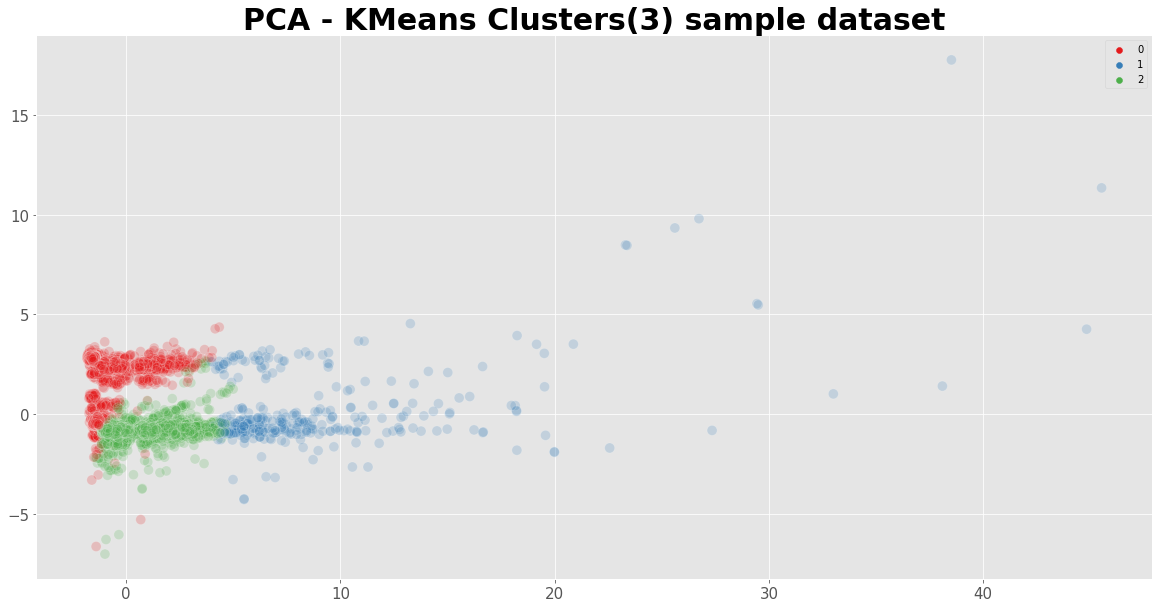

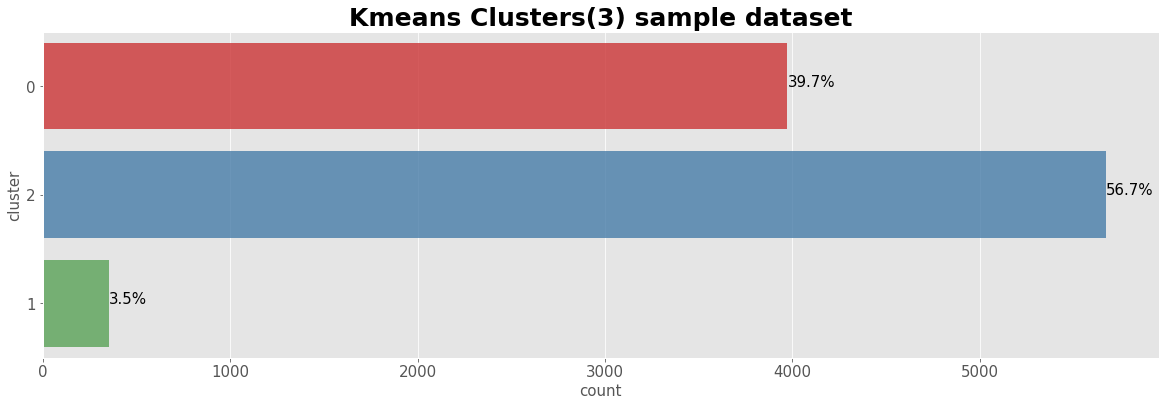

In [204]:
kmeans_clustering_pca(X_sample, k=3, get_model='KMeans3_X_sample', get_folder='model/', 
                      add_title='sample dataset')

Les clusters ne sont pas tous de taille équivalente, une forte supériorité de l'activité est facilement identifiée avec un cluster à plus de 70%.\
**Le partitionnement en 4 clusters pourra peut-être apporter une valeur ajoutée en termes  d'interprétation métier.**

In [205]:
#t-SNE (t-Stochastic Neighbour Embedding)
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_sample)

c:\Python3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


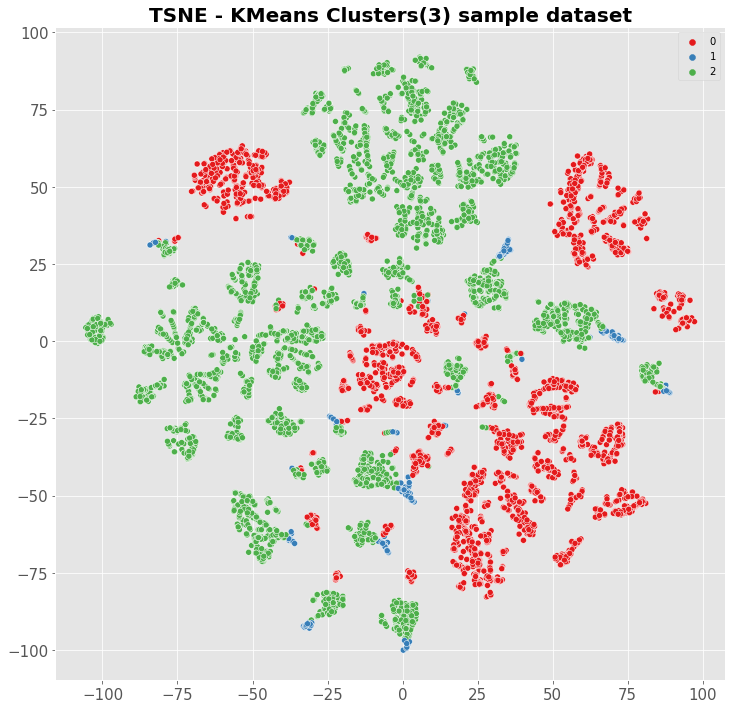

Time TSNE plot: 0.79 seconds


In [206]:
kmeans_clustering_tsne(X_sample, k=3, get_model='KMeans3_X_sample', get_folder='model/',
                       add_title='sample dataset')

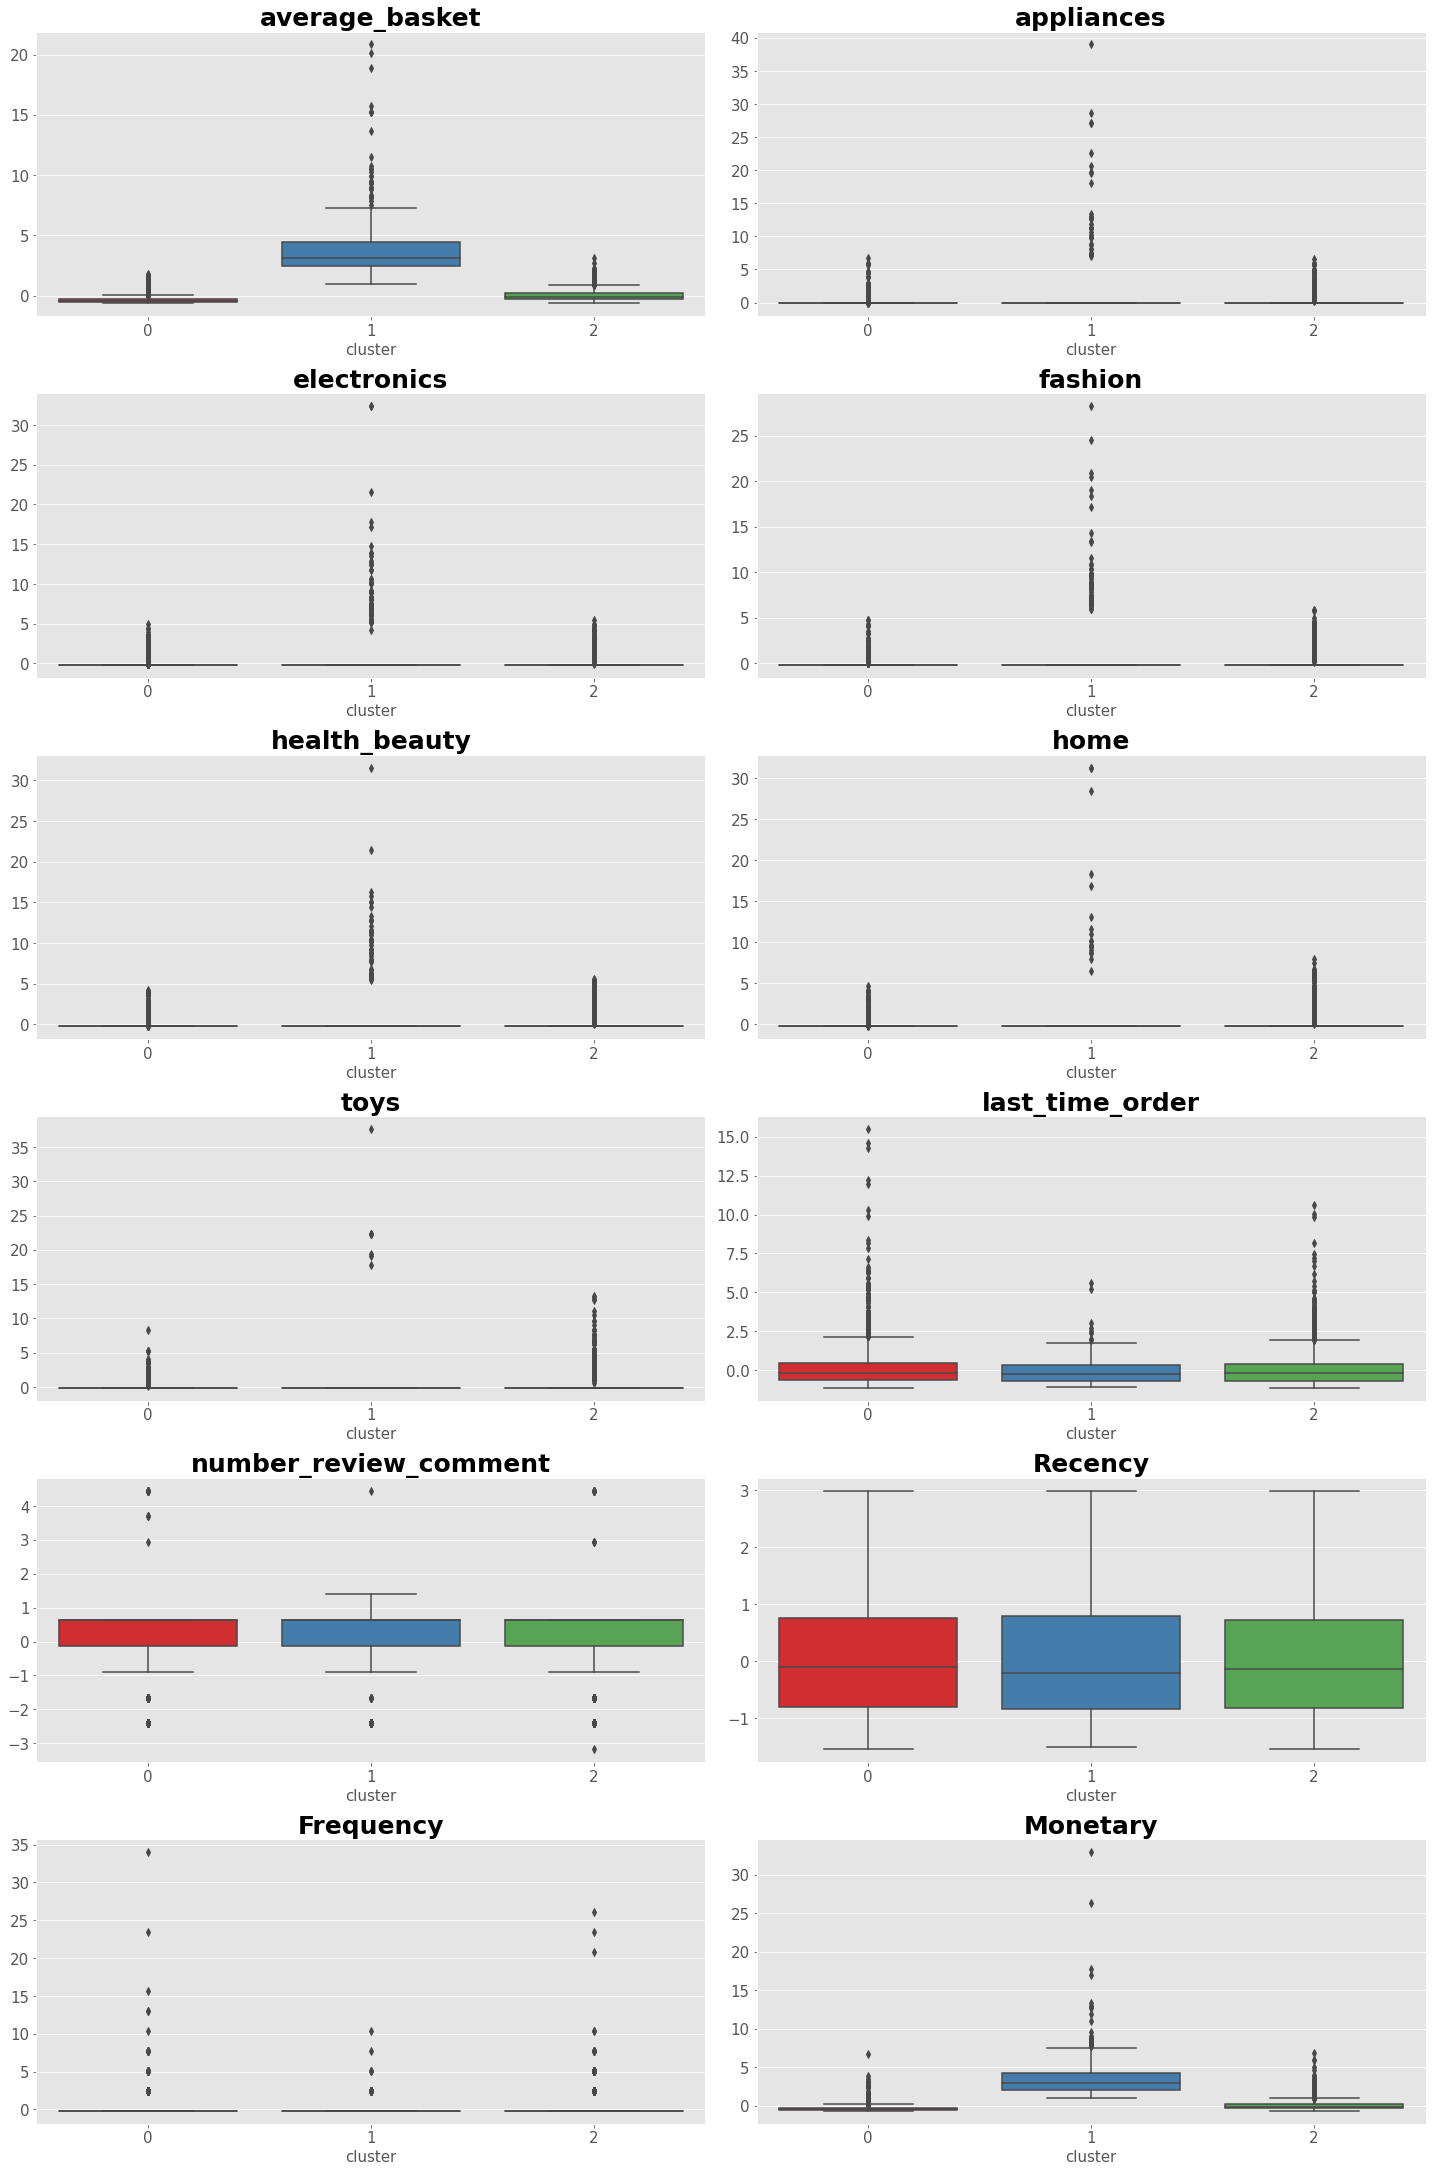

In [207]:
features_kmeans(X_sample, ['average_basket', 'number_orders', 'last_time_order', 
                            'number_review_comment', 'home', 'health_beauty', 
                           'fashion', 'electronics', 'appliances', 'toys', 
                            'Recency', 'Frequency', 'Monetary'
                          ], 
                get_model='KMeans3_X_sample', get_folder='model/')

Les centroïdes ci-dessous permettent de comparer les clusters entre eux selon les variables. Une analyse peut être faite à partir des centroïdes, ici elle sera faite plus loin dans l'analyse, une fois toutes les optimisations réalisées. **Visuellement la comparaison est possible à partir des éléments ci-dessous :** 

In [208]:
centroids_cls(X_sample, get_model='KMeans3_X_sample', get_folder='model/')[1]

average_basket  max_order_amount  min_order_amount  \
0       -0.349779         -0.350432         -0.350432   
1        4.018556          4.034456          4.034456   
2        0.006677          0.005135          0.005135   

   number_of_products_purchased  bucket_quartile_lower25  \
0                           0.0                 0.861930   
1                           0.0                -0.577266   
2                           0.0                -0.574008   

   bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
0              -0.236652              -0.267547                -0.357679   
1              -0.579405              -0.576323                 1.735138   
2               0.199467               0.218891                 0.155714   

   payment_boleto  payment_credit_card  payment_debit_card  payment_voucher  \
0        0.732144            -0.791072            0.185024         0.045287   
1       -0.130900             0.174300           -0.010529         0.036939   
2       -0.494730             0.529716           -0.122207        -0.027170   

   appliances      auto  construction   culture  electronics   fashion  \
0   -0.061540 -0.063776     -0.041930 -0.016691    -0.069842 -0.114083   
1    1.206909  0.616444      0.868207  0.337889     1.470189  1.408115   
2   -0.020579  0.001173     -0.005404 -0.011609    -0.049174 -0.017200   

       food    garden  health_beauty   hobbies      home    office    others  \
0 -0.009182 -0.048525      -0.135715 -0.033724 -0.144487 -0.068492 -0.081393   
1  0.359569  1.040928       1.436522  0.378750  0.440289  0.353595  1.062779   
2 -0.010886 -0.024294       0.021268 -0.019306  0.071973  0.014906  0.019930   

       pets  sports_leisure      toys  last_time_order  number_review_comment  \
0 -0.047594       -0.090069 -0.075575         0.069506               0.009762   
1  0.299577        0.853250  0.322785        -0.083430               0.047517   
2  0.025383        0.029131  0.007093        -0.028544              -0.002924   

    Recency  Frequency  Monetary  state_MG  state_PR  state_RJ  state_RS  \
0  0.025841   0.001812 -0.329671  0.115975  0.056101  0.116981  0.054591   
1 -0.001677   0.047712  3.769926  0.132768  0.028249  0.132768  0.062147   
2 -0.008145   0.006576  0.013323  0.122377  0.047787  0.138776  0.054840   

   state_SP  state_other  
0  0.461887     0.194465  
1  0.316384     0.327684  
2  0.391994     0.244225

In [209]:
kmeans_model(X_sample, k=4, folder='model/')

Time: 0.26 seconds


KMeans(n_clusters=4)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.143
Time pca plot: 3.32 seconds


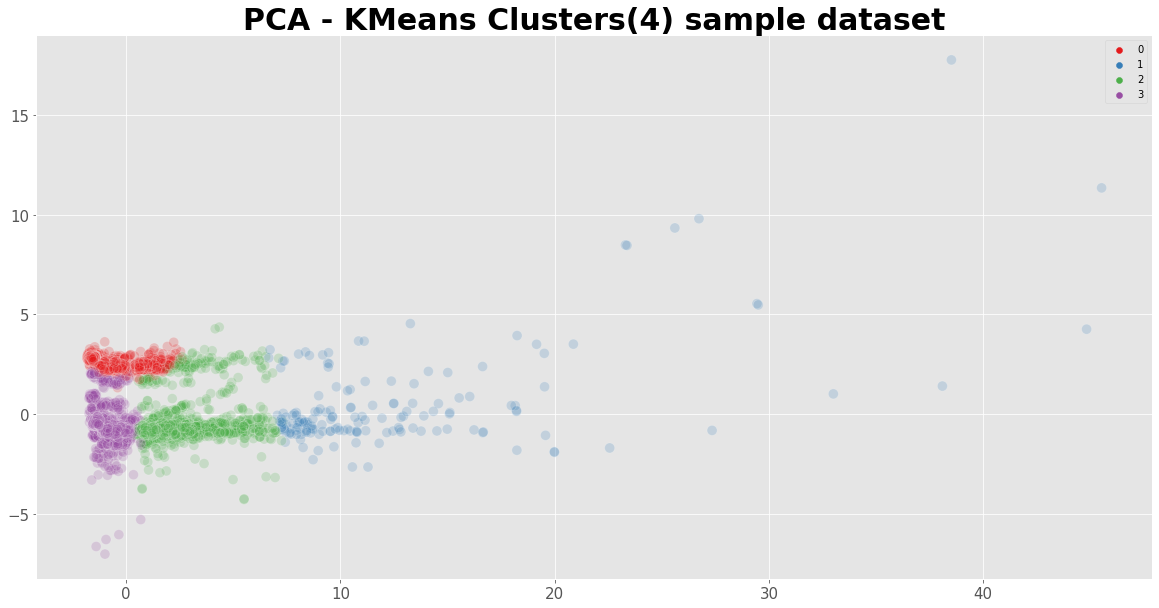

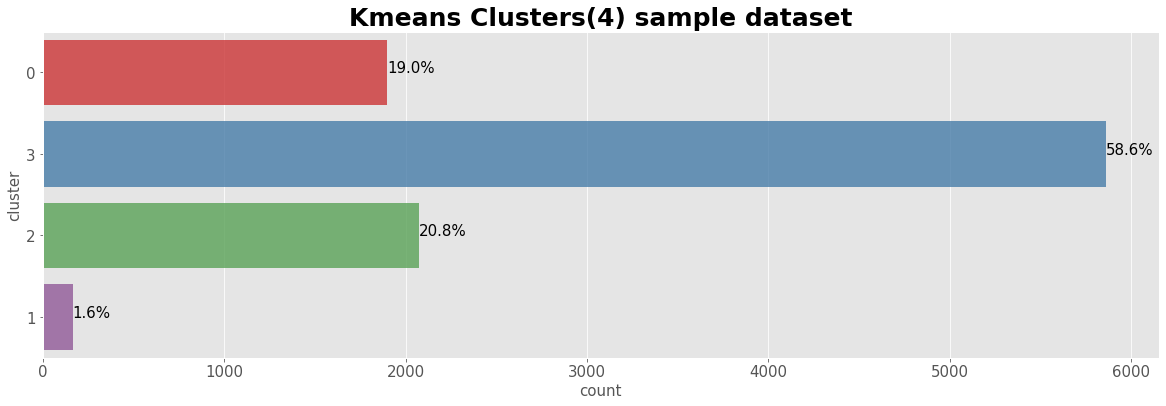

In [210]:
kmeans_clustering_pca(X_sample, k=4, get_model='KMeans4_X_sample', get_folder='model/', 
                      add_title='sample dataset')

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


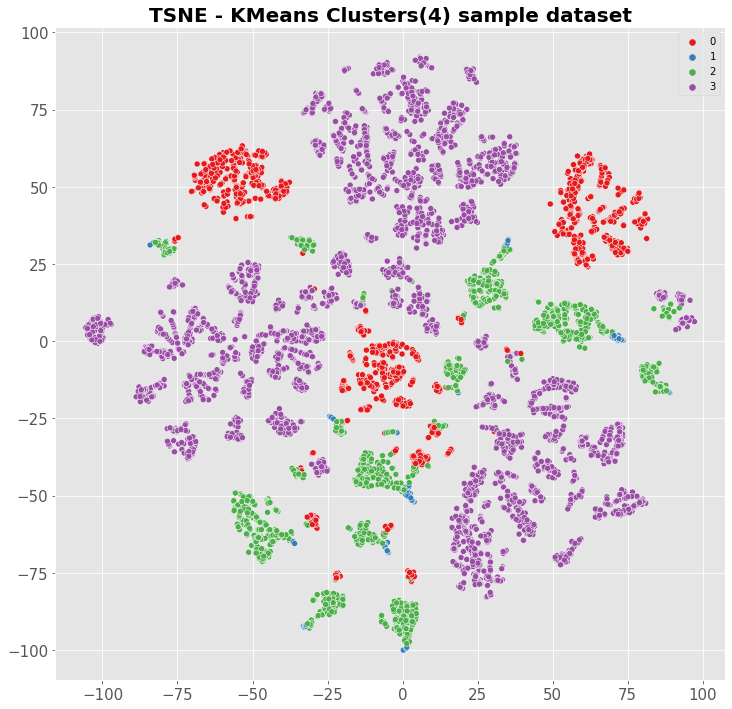

Time TSNE plot: 0.857 seconds


In [211]:
kmeans_clustering_tsne(X=X_sample, k=4, get_model='KMeans4_X_sample', get_folder='model/',
                       add_title='sample dataset')

L’algorithme t-SNE qui est une méthode intéressante pour visualiser nos données, seulement il ne sera pas reconduit sur l'ensemble de l'échantillon car trop consommateur en temps de calcul sur ma machine.

In [212]:
centroids_cls(X_sample, get_model='KMeans4_X_sample', get_folder='model/')[1]

average_basket  max_order_amount  min_order_amount  \
0       -0.250919         -0.250040         -0.250040   
1        5.764710          5.791023          5.791023   
2        0.701434          0.702825          0.702825   
3       -0.317543         -0.320035         -0.320035   

   number_of_products_purchased  bucket_quartile_lower25  \
0                           0.0                 0.184077   
1                           0.0                -0.577266   
2                           0.0                -0.577266   
3                           0.0                 0.155411   

   bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
0               0.042144               0.001847                -0.228204   
1              -0.579405              -0.576323                 1.735138   
2              -0.577184              -0.576323                 1.732911   
3               0.204638               0.215333                -0.575929   

   payment_boleto  payment_credit_card  payment_debit_card  payment_voucher  \
0        2.005197            -1.816339           -0.125067        -0.139530   
1       -0.195201             0.233658           -0.026772         0.072489   
2       -0.382917             0.379865            0.023369        -0.033608   
3       -0.498704             0.434007            0.039610         0.061739   

   appliances      auto  construction   culture  electronics   fashion  \
0   -0.054141 -0.049988     -0.026516 -0.009163    -0.050297 -0.096823   
1    2.115146  0.434056      1.763627 -0.043499     2.218303  1.680073   
2    0.080505  0.180004      0.092140  0.043721     0.133877  0.239558   
3   -0.059281 -0.064678     -0.054931 -0.013439    -0.099740 -0.109764   

       food    garden  health_beauty   hobbies      home    office    others  \
0 -0.022145 -0.023503      -0.107550 -0.036220 -0.089849 -0.024438 -0.052493   
1 -0.070839  2.039973       2.311670  0.593133  0.569947  0.424934  1.080001   
2  0.063976  0.008688       0.288105  0.040252  0.263600  0.169062  0.244257   
3 -0.008535 -0.046446      -0.117001 -0.037903 -0.082075 -0.074612 -0.071653   

       pets  sports_leisure      toys  last_time_order  number_review_comment  \
0 -0.036560       -0.050993 -0.050639         0.082757              -0.002150   
1  0.147593        1.433389  0.095022        -0.047318               0.002375   
2  0.079255        0.193750  0.125690        -0.089625               0.009993   
3 -0.010008       -0.073834 -0.055694         0.020749               0.003753   

    Recency  Frequency  Monetary  state_MG  state_PR  state_RJ  state_RS  \
0  0.085019  -0.101505 -0.227944  0.115324  0.060032  0.117430  0.067930   
1  0.042204   0.096918  5.430092  0.103030  0.048485  0.181818  0.060606   
2 -0.037968  -0.019052  0.665854  0.126204  0.048170  0.134393  0.054432   
3 -0.005744   0.047390 -0.297909  0.120137  0.048123  0.130887  0.050853   

   state_SP  state_other  
0  0.418641     0.220642  
1  0.272727     0.333333  
2  0.355010     0.281792  
3  0.442662     0.207338

La première remarque à faire pour ces deux clustering est la stabilité du coefficient de silhouette.

In [213]:
kmeans_model(X_sample, k=5, folder='model/')

Time: 0.358 seconds


KMeans(n_clusters=5)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.159
Time pca plot: 3.223 seconds


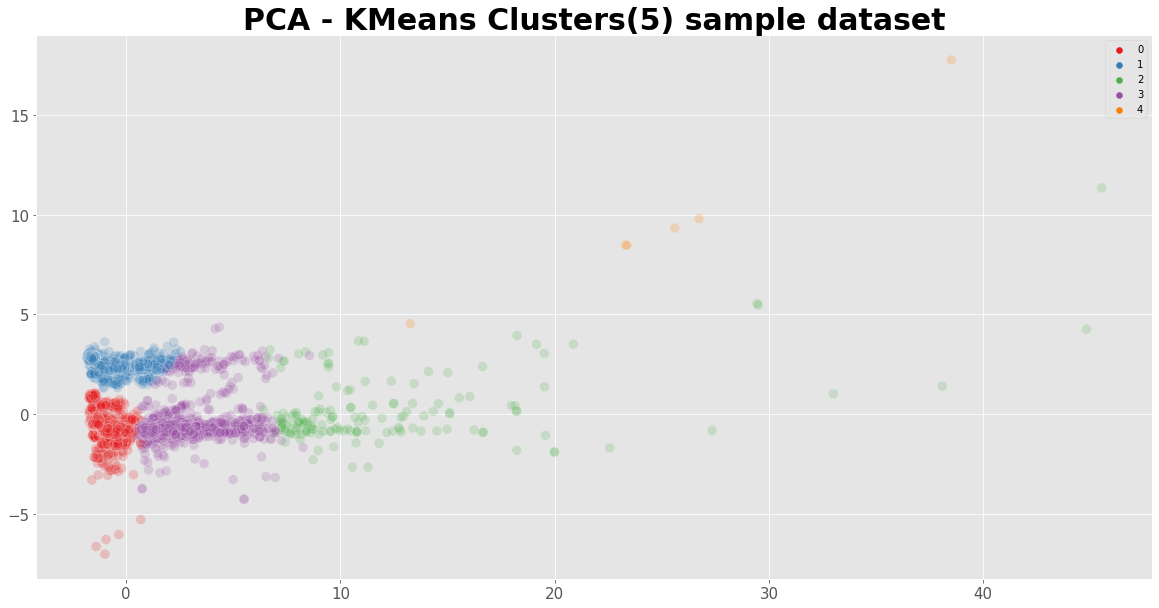

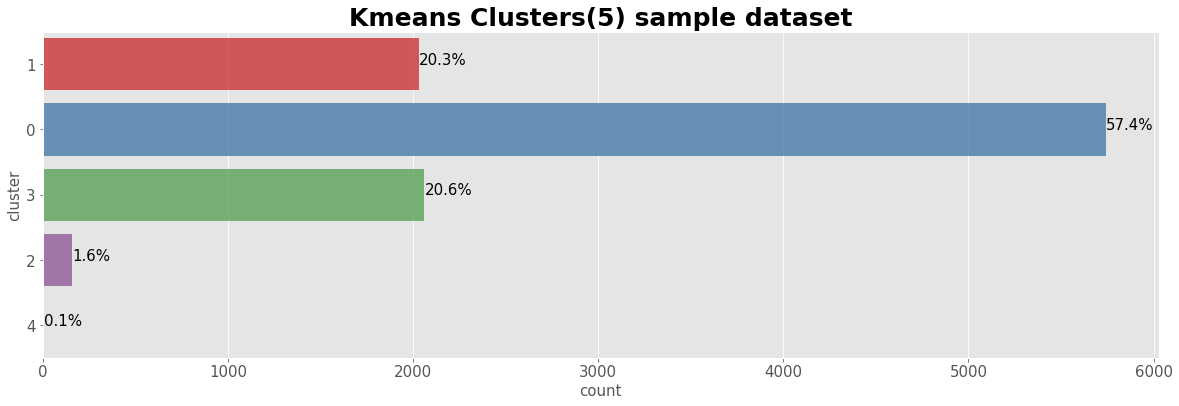

In [214]:
kmeans_clustering_pca(X_sample, k=5, get_model='KMeans5_X_sample', get_folder='model/', 
                      add_title='sample dataset')

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


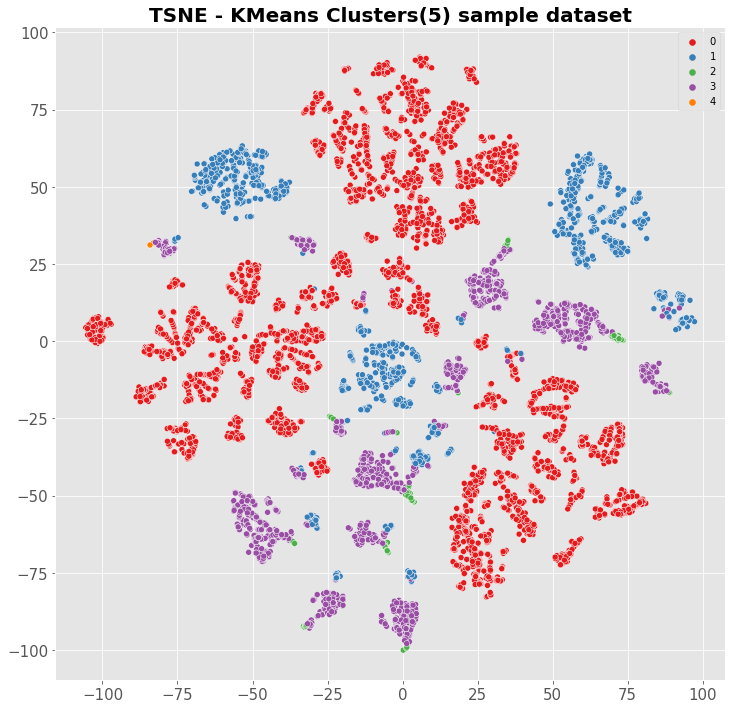

Time TSNE plot: 0.903 seconds


In [215]:
kmeans_clustering_tsne(X=X_sample, k=5, get_model='KMeans5_X_sample', get_folder='model/',
                       add_title='sample dataset')

### Modélisation avec un algorithme de Clustering Hiérarchique
L'algorithme cherche à créer des clusters homogènes bien séparés par récurrence, et permet de partitionner un jeu de données de manière hiérarchique. À chaque étape, on agrège les deux clusters les plus proches.

### Quelques fonctions utiles à l'analyse…

In [216]:
def model_save(X, n_cls, folder):
    '''Save my model in a folder for future use.'''
    start_time = time.time()
    model = AgglomerativeClustering(n_clusters=n_cls).fit(X)
    filename = str(model).split('(')[0]
    pickle.dump(model, open(folder + filename + str(n_cls) + '_' + str(X.name) + '.pkl', 'wb'))
    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    return model

In [217]:
def plot_dendrogram(X, **kwargs):
    '''Plot Hierarchical Clustering Dendrogram.'''
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(X)
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    show()


In [218]:
def clusters_cah(X, model):
    '''Percentage distribution clusters.'''
    start_time = time.time()
    
    Z = linkage(X, method = 'ward', metric='euclidean')

    fclusters = fcluster(Z, 4, criterion='maxclust')
    idg = np.argsort(fclusters)

    clusters = pd.DataFrame(X.index[idg], fclusters[idg]).reset_index()
    clusters = clusters.rename(columns={'index':'cluster'})

    ax, fig = plt.subplots(figsize=(20,6)) 
    #clusters = pd.DataFrame(model.labels_, columns=['cluster'])
    ax = sns.countplot(data=clusters, y='cluster', palette = 'Set1', alpha=.8, 
                        order=clusters['cluster'].value_counts(sort=False).index, orient='h')

    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(clusters))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
            ax.set_title('Hierarchical Clusters')

    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    show()


In [219]:
def crosstab_cah_kmeans(X, n_clusters, model_cah, model_kmeans):
    '''Crossing of kmeans and cah tables to see similarities.'''    

    Z = linkage(X, method = 'ward', metric='euclidean')

    fclusters = fcluster(Z, n_clusters, criterion='maxclust')
    idg = np.argsort(fclusters)

    clusters = pd.DataFrame(X.index[idg], fclusters[idg]).reset_index()
    clusters = clusters.rename(columns={'index':'cluster'}).set_index('customer_unique_id')
    
    centroids_cah = pd.merge(X, clusters, left_index=True, right_index=True)
    result = pd.crosstab(clusters.cluster, model_kmeans.labels_, rownames=['cah'], colnames=['kmeans'])
    
    return centroids_cah, result

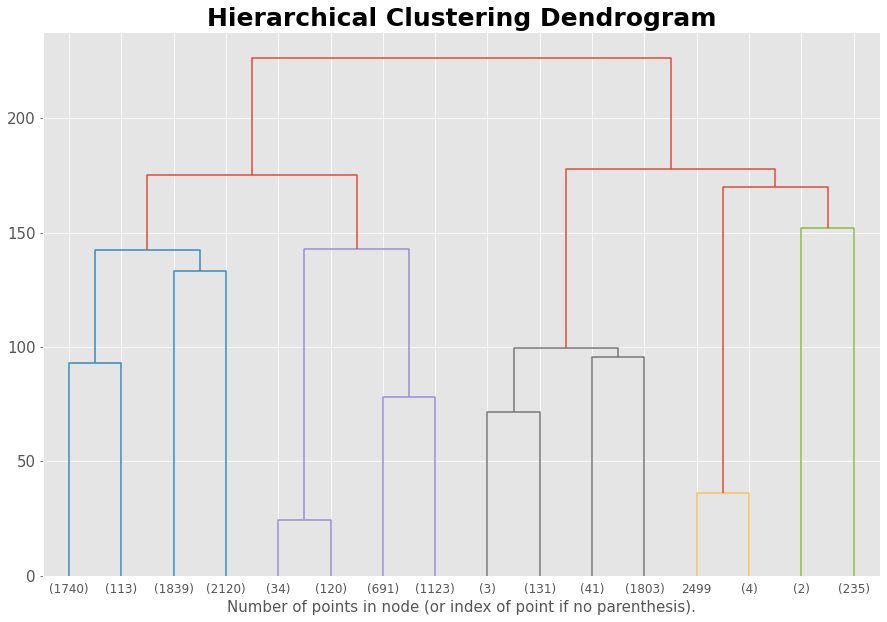

In [220]:
plot_dendrogram(X_sample, truncate_mode='level', p=3)

**Le dendrogramme suggère un partitionnement en 4 groupes**. Voyons ce que donne la projection via le PCA et le T-SNE.

In [221]:
cls4_cah = model_save(X_sample, n_cls=4, folder='model/')
cls4_cah

Time: 8.303 seconds


AgglomerativeClustering(n_clusters=4)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


CAH Silhouette Score: 0.1429901524775923


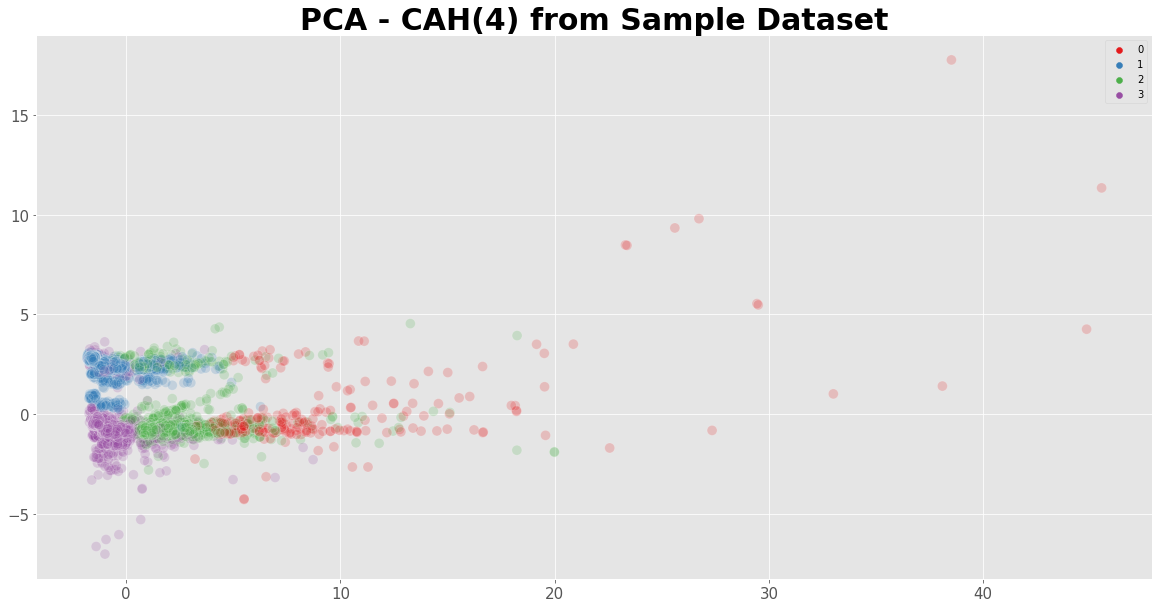

In [222]:
pca = PCA(svd_solver='full').fit(X_sample)
X_projected = pca.transform(X_sample)

plt.figure(figsize=(20, 10))
sns.scatterplot(X_projected[:,0], X_projected[:,1], 
                hue = cls4_cah.labels_, 
                palette = 'Set1',
                s=100, alpha=0.2).set_title('PCA - CAH(4) from Sample Dataset', fontsize=30)

print('CAH Silhouette Score: {}'.format(
    metrics.silhouette_score(X_projected, cls4_cah.labels_, metric='euclidean')))

show()

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


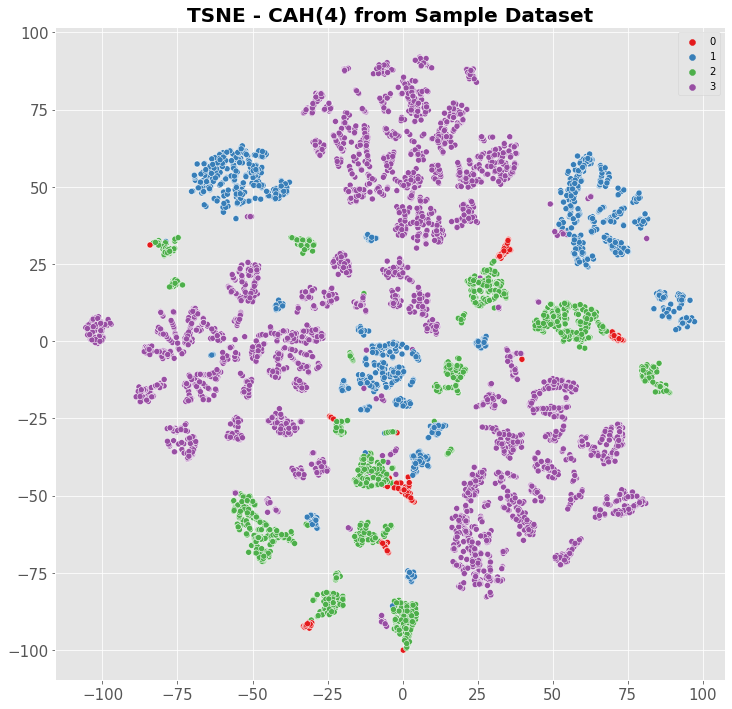

In [223]:
plt.figure(figsize=(12, 12))
sns.scatterplot(T[:,0], T[:,1], hue=cls4_cah.labels_, palette='Set1')
plt.title('TSNE - CAH(4) from Sample Dataset', fontsize=20)
show()

Time: 8.391 seconds


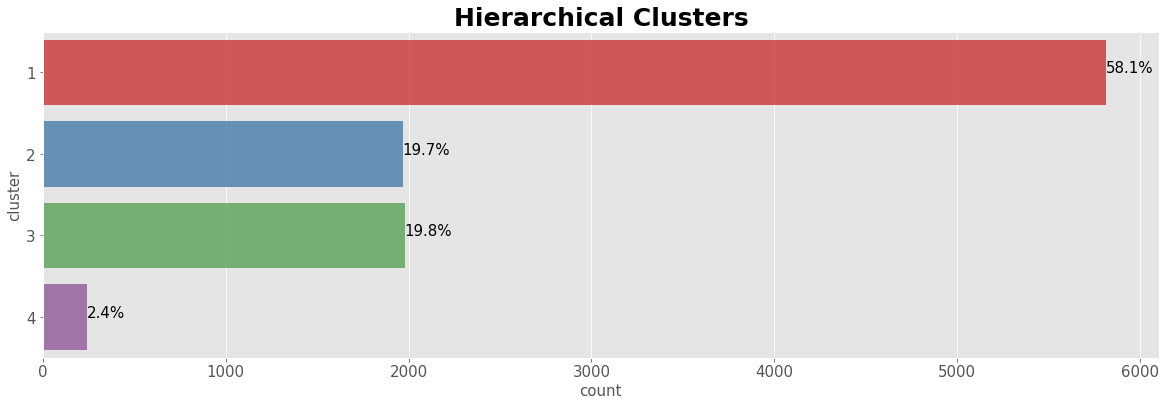

In [224]:
clusters_cah(X_sample, cls4_cah)

L'approche par clustering hierarchique est intéressante, relativement assez proche du KMeans. Ceci étant, le test a été effectué sur un échantillon 9 fois plus petit que celui d'origine, de manière à optimiser (et faciliter les tests) les temps de calcul. **Le clustering hierarchique ne sera pas la modélisation optimale sur l'ensemble des individus, d'autant plus que la population augmentera sans doute dans le temps.**

In [225]:
cls4_kmeans = pickle.load(open('model/KMeans4_X_sample.pkl', 'rb'))
crosstab_cah_kmeans(X_sample, 4, cls4_cah, cls4_kmeans)[0].groupby('cluster').mean()

average_basket  max_order_amount  min_order_amount  \
cluster                                                       
1             -0.299342         -0.302286         -0.302286   
2             -0.255780         -0.257506         -0.257506   
3              0.636858          0.641724          0.641724   
4              4.353324          4.374695          4.374695   

         number_of_products_purchased  bucket_quartile_lower25  \
cluster                                                          
1                                 0.0                 0.137620   
2                                 0.0                 0.227797   
3                                 0.0                -0.577266   
4                                 0.0                -0.577266   

         bucket_quartile_25_50  bucket_quartile_50_75  \
cluster                                                 
1                     0.191678               0.197213   
2                     0.080093              -0.004330   
3                    -0.579405              -0.517894   
4                    -0.579405              -0.576323   

         bucket_quartile_upper75  payment_boleto  payment_credit_card  \
cluster                                                                 
1                      -0.527008       -0.457346             0.483308   
2                      -0.303834        1.670580            -1.807984   
3                       1.676709       -0.267049             0.311733   
4                       1.735138       -0.177957             0.222010   

         payment_debit_card  payment_voucher  appliances      auto  \
cluster                                                              
1                 -0.123671         0.045773   -0.060054 -0.065224   
2                  0.509502        -0.010019   -0.074851 -0.071976   
3                 -0.125067        -0.099104    0.076309  0.262333   
4                  0.008971        -0.046599    1.699685 -0.110737   

         construction   culture  electronics   fashion      food    garden  \
cluster                                                                      
1           -0.071544 -0.000903    -0.097677 -0.106504  0.024773 -0.047199   
2           -0.063269 -0.023253    -0.028890 -0.114304 -0.055909 -0.038120   
3            0.206813  0.024757     0.003705  0.135625 -0.070839  0.029150   
4            0.997046 -0.043499     2.401589  2.161707  0.558766  1.361615   

         health_beauty   hobbies      home    office    others      pets  \
cluster                                                                    
1            -0.115894 -0.039792 -0.070651 -0.074877 -0.072144  0.060101   
2            -0.055803 -0.030770 -0.071126 -0.072962 -0.075184 -0.055549   
3             0.247117  0.053996  0.308140  0.277773  0.172759 -0.080710   
4             1.587894  0.312221 -0.285988 -0.137244  1.616735 -0.080710   

         sports_leisure      toys  last_time_order  number_review_comment  \
cluster                                                                     
1             -0.063460 -0.055788         0.074931               0.008120   
2             -0.033567 -0.046629        -0.036559              -0.013907   
3              0.237002  0.152912        -0.133443              -0.001740   
4              0.311284 -0.133772        -0.060842               0.093672   

          Recency  Frequency  Monetary  state_MG  state_PR  state_RJ  \
cluster                                                                
1        0.004489   0.109582 -0.261350  0.119580  0.048864  0.130420   
2        0.039569  -0.174159 -0.253350  0.108232  0.058435  0.117886   
3       -0.030498  -0.125007  0.583500  0.133974  0.049039  0.138524   
4        0.050810   0.059940  3.979595  0.119835  0.033058  0.144628   

         state_RS  state_SP  state_other  
cluster                                   
1        0.049725  0.439264     0.212147  
2        0.067073  0.431402     0.216972  
3        0.059656  0.350859     0.26

In [226]:
crosstab_cah_kmeans(X_sample, 4, cls4_cah, cls4_kmeans)[1]

kmeans     0    1     2     3
cah                          
1       1119  112  1186  3395
2        365   24   424  1155
3        366   25   410  1177
4         49    4    56   133

Le parallèle entre les deux méthodes (KMeans et CAH) permet d'appuyer l'hypothèse d'une meilleure interprétabilité du contexte métier. Le clustering en 4 partitions permet de mieux différencier notre population selon des caractéritiques similaires entre eux pour l'aide à la décision des opérations Marketing.

Voyons comment améliorer la modélisation retenue KMeans, l'évaluer dans le temps, sa stabilité, etc…

### Modélisation par l'estimation de la densité locale DBSCAN 
L'algorithme DBSCAN est difficile à utiliser sur des jeux de données à grande dimension. Ceci étant, après avoir déterminé l'epsilon optimal, un test de modélisation est nécessaire pour visualiser ce type de clustering.

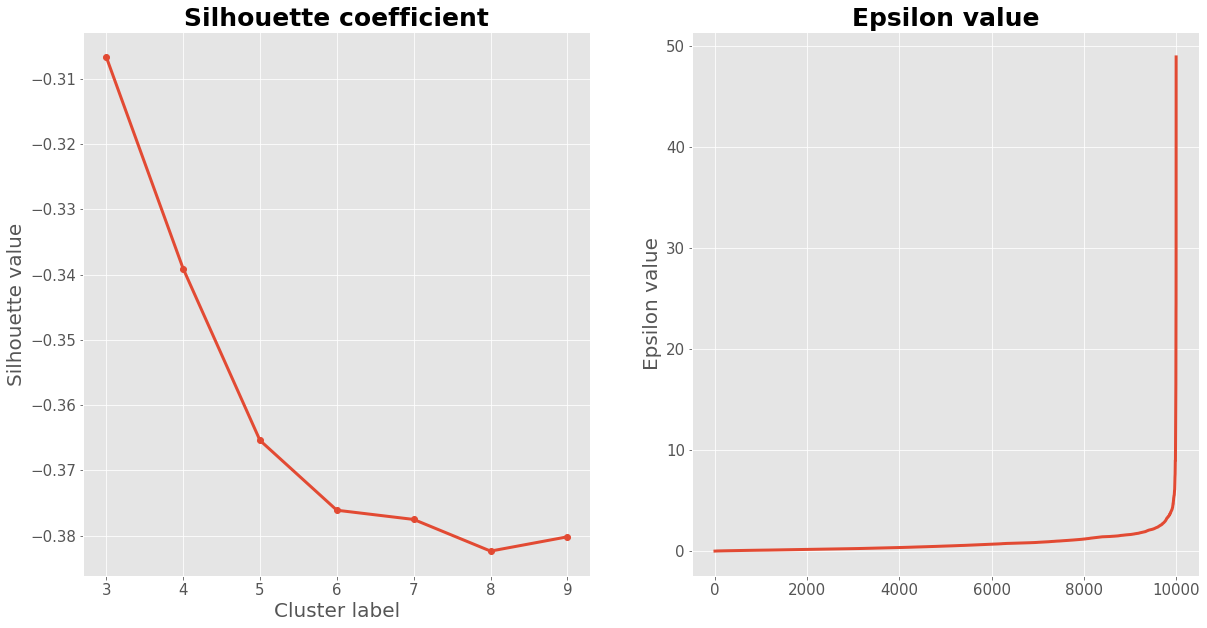

In [227]:
from sklearn.neighbors import NearestNeighbors
plt.figure(figsize=(20,10))
silhouettes = [] 

plt.subplot(121)
for k in range(3,10): 
    dbs = DBSCAN(min_samples=k)  
    dbs.fit(X_sample)
    silh = metrics.silhouette_score(X_sample, dbs.labels_)
    silhouettes.append(silh)
plt.plot(range(3,10), silhouettes, marker='o', linewidth=3)
plt.xlabel('Cluster label', fontsize=20)
plt.ylabel('Silhouette value', fontsize=20)
plt.title("Silhouette coefficient", fontsize=25)

plt.subplot(122)
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X_sample)
distances, indices = nearest_neighbors.kneighbors(X_sample)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances, linewidth=3)
plt.xlabel('', fontsize=20)
plt.ylabel('Epsilon value', fontsize=20)
plt.title("Epsilon value", fontsize=25)

plt.show()

In [228]:
cls_dbs = DBSCAN(eps = 3, min_samples=5)  
cls_dbs.fit(X_sample)

DBSCAN(eps=3)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DBSCAN Silhouette Score: 0.1870132059699191


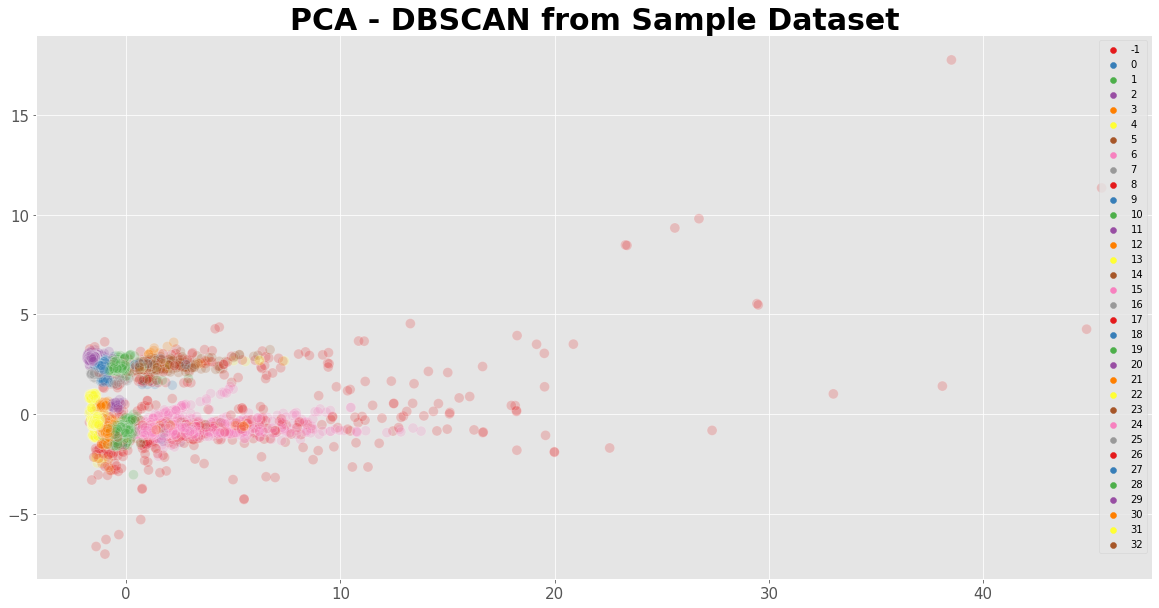

In [229]:
pca = PCA(n_components=20).fit(X_sample)
X_projected = pca.transform(X_sample)

plt.figure(figsize=(20, 10))
sns.scatterplot(X_projected[:,0], X_projected[:,1], 
                hue = cls_dbs.labels_, 
                palette = 'Set1',
                s=100, alpha=0.2).set_title('PCA - DBSCAN from Sample Dataset', fontsize=30)

print('DBSCAN Silhouette Score: {}'.format(
    metrics.silhouette_score(X_projected, cls_dbs.labels_, metric='euclidean')))

show()

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


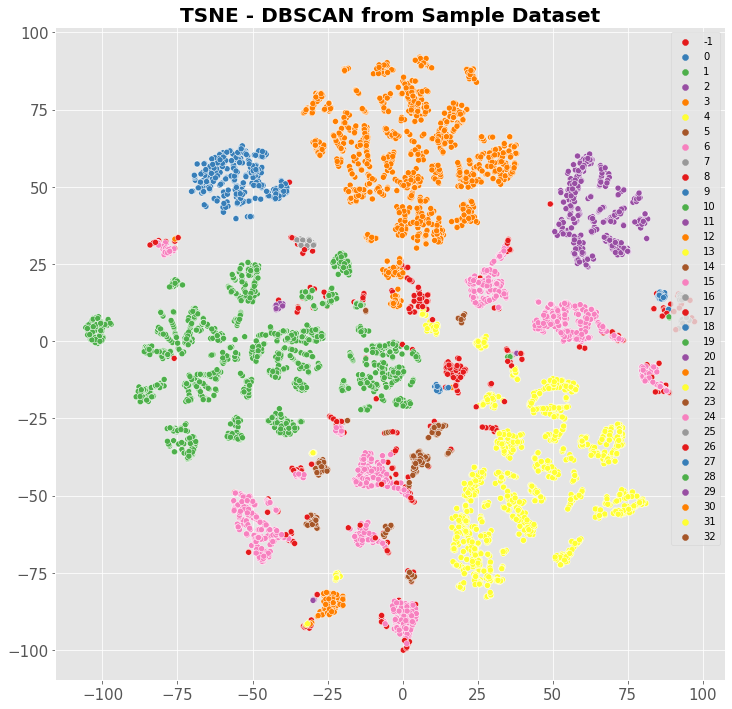

In [230]:
plt.figure(figsize=(12,12))
sns.scatterplot(T[:,0], T[:,1], hue = cls_dbs.labels_, palette='Set1')
plt.title('TSNE - DBSCAN from Sample Dataset', fontsize=20)
show()

Malgré l'avantage du DBSCAN d'être efficace en temps de calcul sans requérir de prédéfinir le nombre de clusters, **le clustering par densité n'est pas efficace sur notre échantillon.**

# Modélisation KMeans sur l'ensemble de l'échantillon
Les premières étapes KMeans ont été exercées sur un échantillon aléatoire de 10000 individus, rappelons que l'échantillon de travail comporte une population 9 fois plus grande. Voyons si les résultats restents stables.

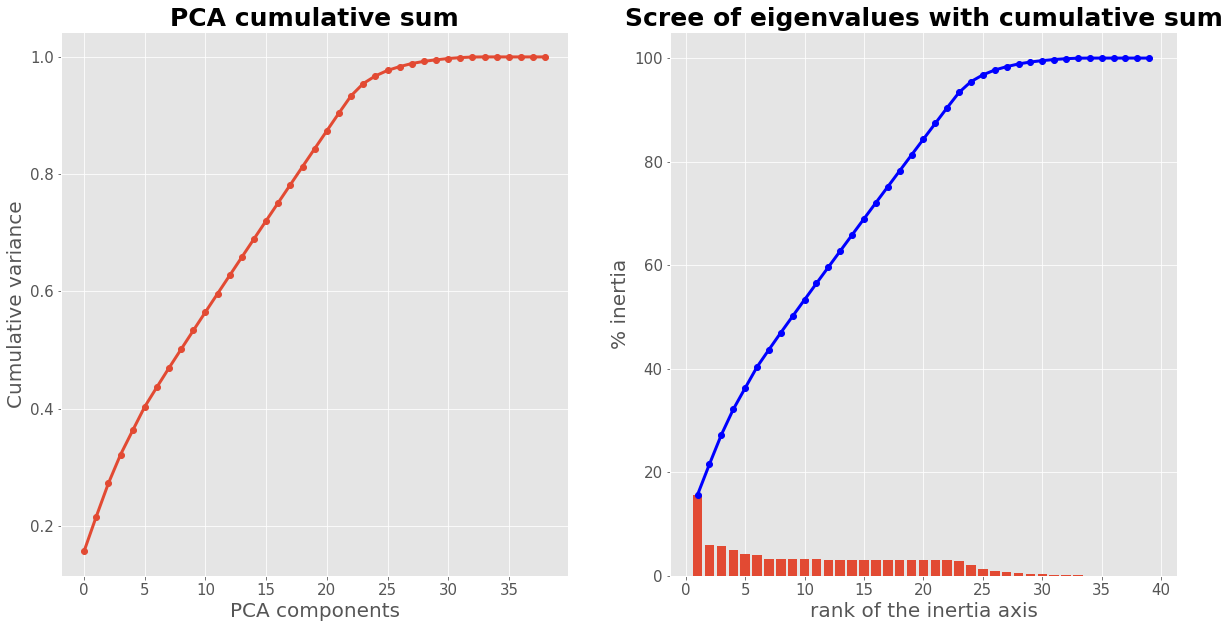

In [231]:
pca_eigenvalues(X)

In [232]:
pca = PCA(n_components=20).fit(X)
pca.explained_variance_ratio_.cumsum()

array([0.1569156 , 0.21587589, 0.27255281, 0.32149948, 0.36272659,
       0.40345025, 0.43683651, 0.46964216, 0.5015851 , 0.53335564,
       0.56491627, 0.59621986, 0.62742032, 0.65859665, 0.68963908,
       0.72065311, 0.75147208, 0.7822273 , 0.81292584, 0.84351361])

In [239]:
pca = PCA(n_components=25).fit(X)
pca.explained_variance_ratio_.cumsum()

array([0.1569156 , 0.21587589, 0.27255281, 0.32149948, 0.36272659,
       0.40345025, 0.43683651, 0.46964216, 0.5015851 , 0.53335564,
       0.56491627, 0.59621986, 0.62742032, 0.65859665, 0.68963908,
       0.72065311, 0.75147208, 0.7822273 , 0.81292584, 0.84351361,
       0.87396453, 0.90431582, 0.93376903, 0.95453143, 0.96757038])

Stabilité des PCA Components entre l'échantillonnage et le jeu de données complet.

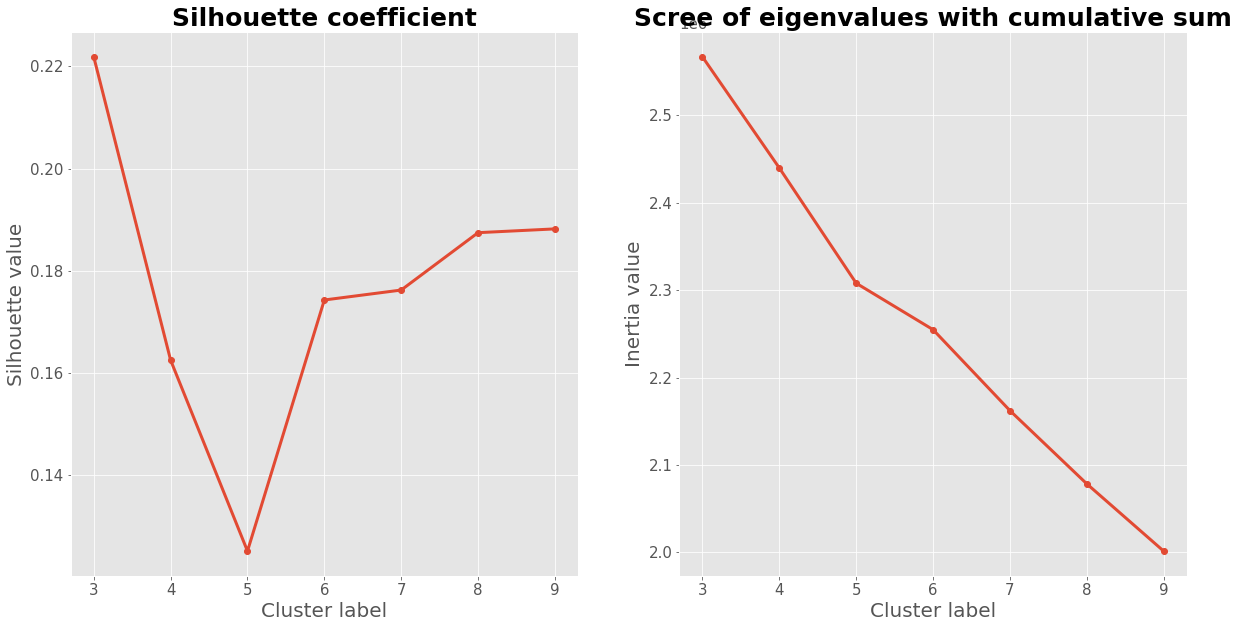

Time: 1295.302 seconds


In [240]:
silhouette_inertia(X)

Notons que les coefficients de silhouette évoluent de la même manière entre l'échantillonnage et le jeu de données complet.

In [241]:
kmeans_model(X, k=4, folder='model/')

Time: 1.428 seconds


KMeans(n_clusters=4)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.085
Time pca plot: 175.004 seconds


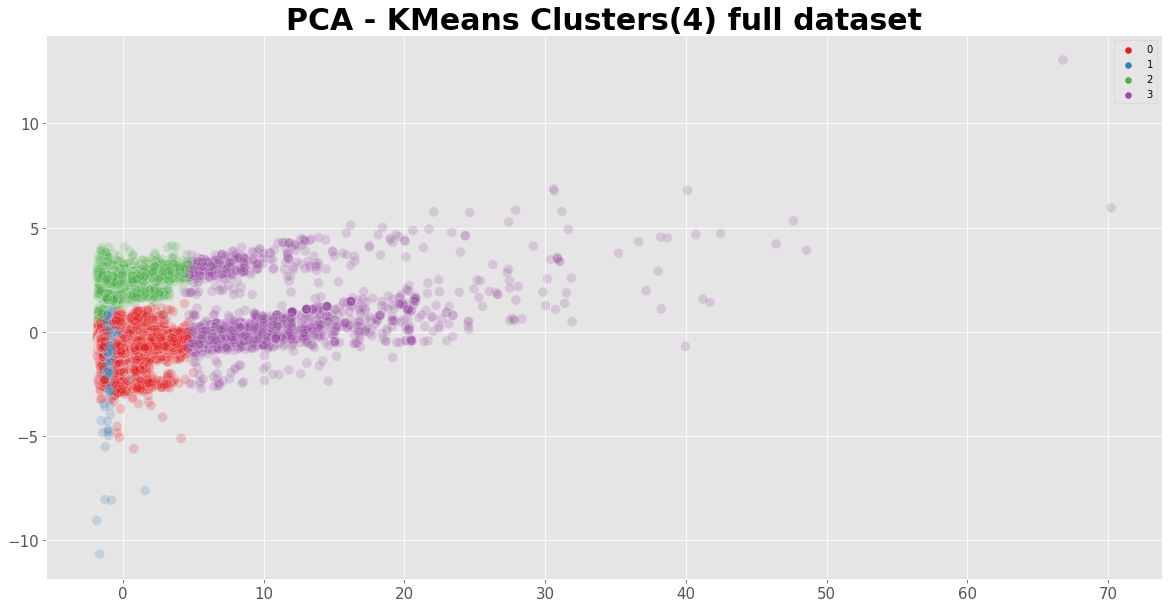

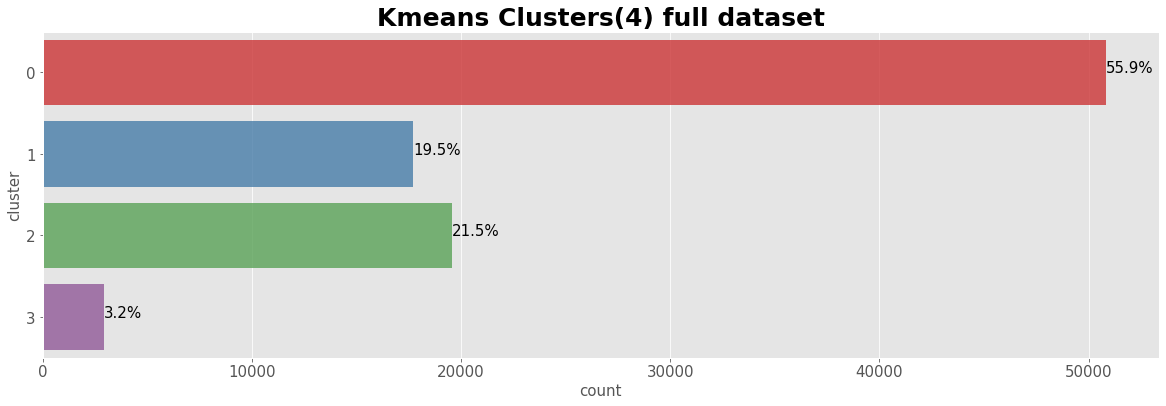

In [242]:
kmeans_clustering_pca(X, k=4, get_model='KMeans4_X', get_folder='model/', add_title='full dataset')

In [236]:
data_cls(olistbr, get_model='KMeans4_X', get_folder='model/')

average_basket  max_order_amount  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2          129.90            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           18.90             18.90   
0000f46a3911fa3c0805444483337064           69.00             69.00   
0000f6ccb0745a6a4b88665a16c9f078           25.99             25.99   
0004aac84e0df4da2b147fca70cf8255          180.00            180.00   
...                                          ...               ...   
feb5c47a617972ee276d95775a34d494           17.00             17.00   
feb71814f4fc973744c1a371b9b7a731          119.90            119.90   
feb77fc3007f38e928e1b5b13835d296          349.90            349.90   
feb831cd3d26eea79e54b930a3a39431           56.99             56.99   
feb8c6afadc3c588d2b20b62968171c6           27.99             27.99   

                                  min_order_amount  \
customer_unique_id                                   
0000366f3b9a7992bf8c76cfdf3221e2            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f             18.90   
0000f46a3911fa3c0805444483337064             69.00   
0000f6ccb0745a6a4b88665a16c9f078             25.99   
0004aac84e0df4da2b147fca70cf8255            180.00   
...                                            ...   
feb5c47a617972ee276d95775a34d494             17.00   
feb71814f4fc973744c1a371b9b7a731            119.90   
feb77fc3007f38e928e1b5b13835d296            349.90   
feb831cd3d26eea79e54b930a3a39431             56.99   
feb8c6afadc3c588d2b20b62968171c6             27.99   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           1.0   
0000f46a3911fa3c0805444483337064                           1.0   
0000f6ccb0745a6a4b88665a16c9f078                           1.0   
0004aac84e0df4da2b147fca70cf8255                           1.0   
...                                                        ...   
feb5c47a617972ee276d95775a34d494                           1.0   
feb71814f4fc973744c1a371b9b7a731                           1.0   
feb77fc3007f38e928e1b5b13835d296                           1.0   
feb831cd3d26eea79e54b930a3a39431                           1.0   
feb8c6afadc3c588d2b20b62968171c6                           1.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      0.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      0.0   
...                                                   ...   
feb5c47a617972ee276d95775a34d494                      1.0   
feb71814f4fc973744c1a371b9b7a731                      0.0   
feb77fc3007f38e928e1b5b13835d296                      0.0   
feb831cd3d26eea79e54b930a3a39431                      0.0   
feb8c6afadc3c588d2b20b62968171c6                      0.0   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                    0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0.0   
0000f46a3911fa3c0805444483337064                    1.0   
0000f6ccb0745a6a4b88665a16c9f078                    0.0   
0004aac84e0df4da2b147fca70cf8255                    0.0   
...                                                 ...   
feb5c47a617972ee276d95775a34d494                    0.0   
feb71814f4fc973744c1a371b9b7a731                    0.0   
feb77fc3007f38e928e1b5b13835d296                    0.0   
feb831cd3d26eea79e54b930a3a39431                    1.0   
feb8c6afadc3c588d2b20b62968171c6                    1.0   


In [237]:
centroids_cls(X, get_model='KMeans4_X', get_folder='model/')[1].T

0         1         2         3
average_basket               -0.434168  5.906164  0.658528 -0.105980
max_order_amount             -0.437403  5.918429  0.664065 -0.105448
min_order_amount             -0.437403  5.918429  0.664065 -0.105448
number_of_products_purchased  0.000000  0.000000  0.000000  0.000000
bucket_quartile_lower25       0.576758 -0.577266 -0.577050 -0.577266
bucket_quartile_25_50         0.573758 -0.579405 -0.578325 -0.579405
bucket_quartile_50_75        -0.576323 -0.576323 -0.576323  1.735138
bucket_quartile_upper75      -0.576323  1.735138  1.733839 -0.576323
payment_boleto                0.060667 -0.167014 -0.090825 -0.021955
payment_credit_card          -0.077822  0.207922  0.114122  0.031135
payment_debit_card            0.016958  0.003374 -0.020269 -0.013014
payment_voucher               0.022911 -0.027992 -0.033175 -0.010354
appliances                   -0.074113  1.760412  0.086509 -0.039293
auto                         -0.081313  1.179185  0.132875 -0.032187
construction                 -0.067464  1.004707  0.113531 -0.032021
culture                      -0.020516  0.206123  0.010820  0.018714
electronics                  -0.111277  2.741455  0.139734 -0.075271
fashion                      -0.133312  2.164903  0.219341 -0.072242
food                          0.009354 -0.070839  0.008499 -0.023029
garden                       -0.049338  1.296772  0.046205 -0.025850
health_beauty                -0.163758  1.883145  0.270837 -0.040098
hobbies                      -0.038183  1.400062  0.028632 -0.035138
home                         -0.155000  0.805921  0.244014  0.034449
office                       -0.108180  0.542902  0.177656  0.018305
others                       -0.111137  0.539591  0.217936 -0.014791
pets                         -0.053494  0.377133  0.055996  0.032918
sports_leisure               -0.116061  1.172170  0.157372  0.015923
toys                         -0.081614  0.090962  0.163578  0.005200
last_time_order               0.053394 -0.106405 -0.064372 -0.035030
number_review_comment         0.002827 -0.054640 -0.011327  0.002140
Recency                       0.014667 -0.005373 -0.015045 -0.011863
Frequency                     0.012026 -0.013984 -0.013608 -0.006624
Monetary                     -0.411678  5.394605  0.633104 -0.094419
state_MG                      0.114323  0.122390  0.119820  0.122991
state_PR                      0.051927  0.046076  0.049820  0.051960
state_RJ                      0.118734  0.141109  0.134850  0.135705
state_RS                      0.054956  0.050396  0.056375  0.057037
state_SP                      0.464994  0.313895  0.353655  0.392857
state_other                   0.195066  0.326134  0.285480  0.239449

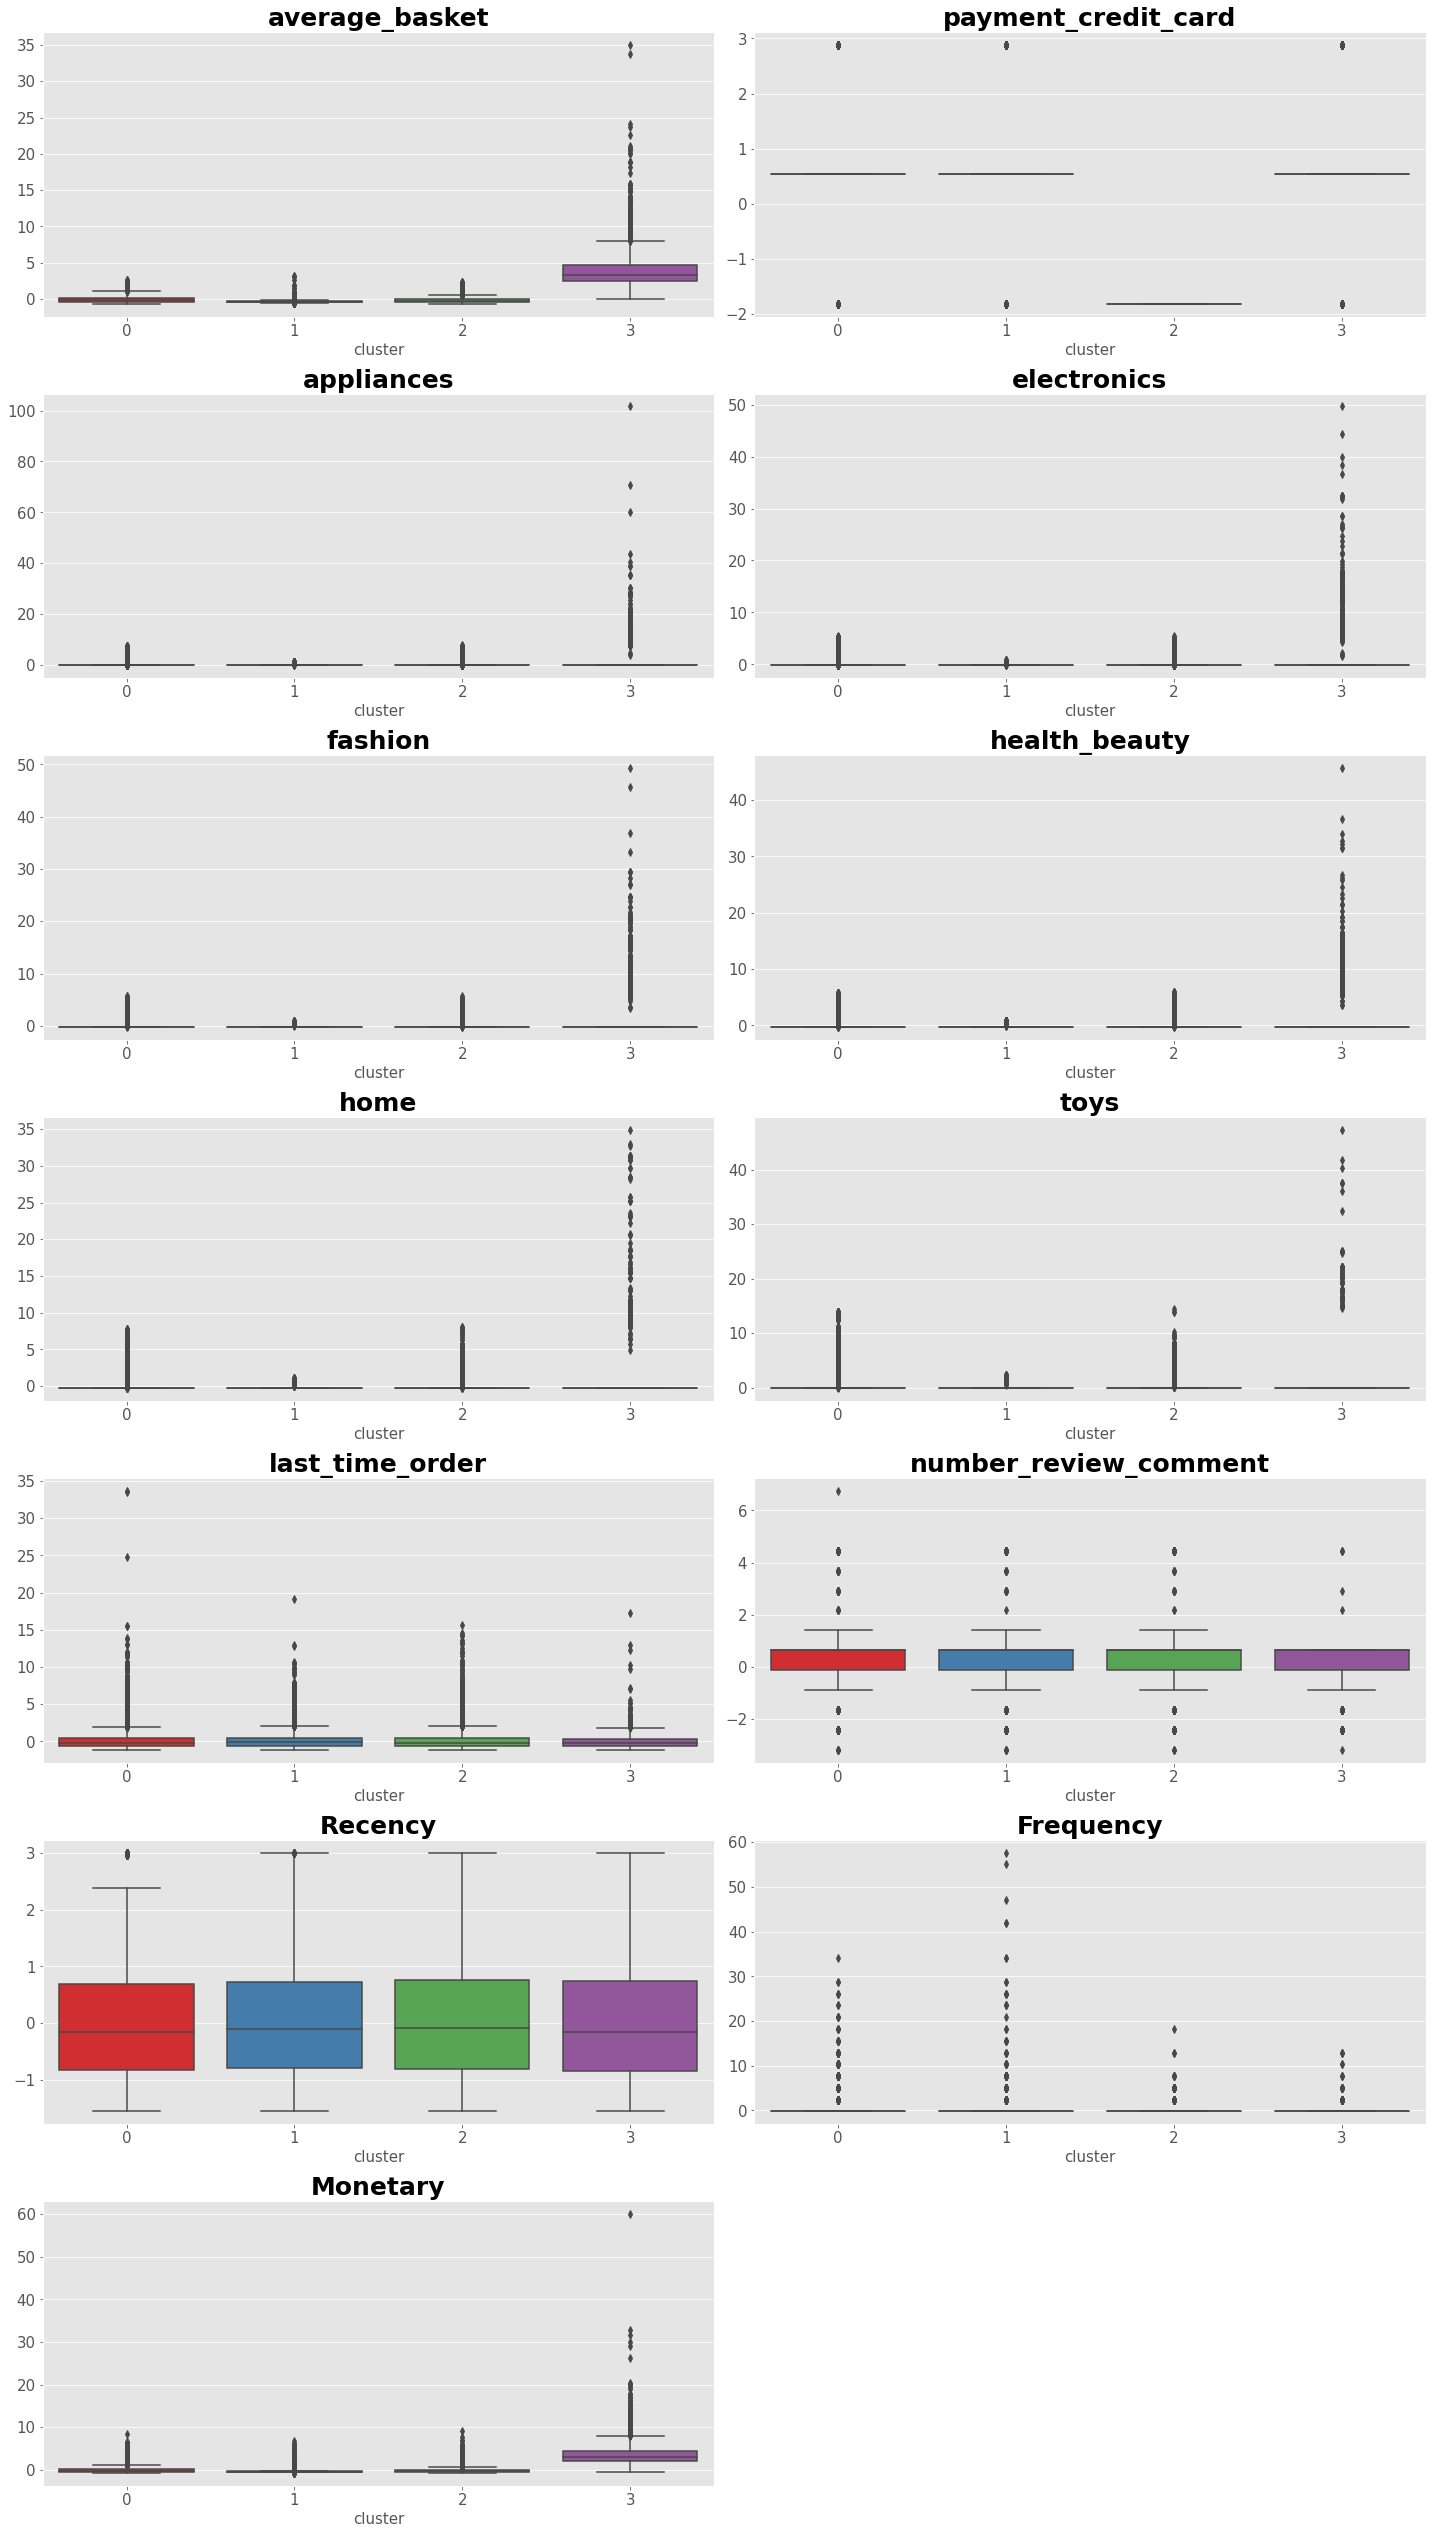

In [243]:
features_kmeans(X, ['average_basket', 'last_time_order', 'payment_credit_card',  
                     'number_review_comment', 'home', 'health_beauty', 'fashion', 'electronics', 'appliances', 'toys', 'Recency', 
                     'Frequency', 'Monetary'] ,

                get_model='KMeans4_X', get_folder='model/')

In [244]:
data_cls(olistbr, get_model='KMeans4_X', get_folder='model/')

average_basket  max_order_amount  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2          129.90            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           18.90             18.90   
0000f46a3911fa3c0805444483337064           69.00             69.00   
0000f6ccb0745a6a4b88665a16c9f078           25.99             25.99   
0004aac84e0df4da2b147fca70cf8255          180.00            180.00   
...                                          ...               ...   
feb5c47a617972ee276d95775a34d494           17.00             17.00   
feb71814f4fc973744c1a371b9b7a731          119.90            119.90   
feb77fc3007f38e928e1b5b13835d296          349.90            349.90   
feb831cd3d26eea79e54b930a3a39431           56.99             56.99   
feb8c6afadc3c588d2b20b62968171c6           27.99             27.99   

                                  min_order_amount  \
customer_unique_id                                   
0000366f3b9a7992bf8c76cfdf3221e2            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f             18.90   
0000f46a3911fa3c0805444483337064             69.00   
0000f6ccb0745a6a4b88665a16c9f078             25.99   
0004aac84e0df4da2b147fca70cf8255            180.00   
...                                            ...   
feb5c47a617972ee276d95775a34d494             17.00   
feb71814f4fc973744c1a371b9b7a731            119.90   
feb77fc3007f38e928e1b5b13835d296            349.90   
feb831cd3d26eea79e54b930a3a39431             56.99   
feb8c6afadc3c588d2b20b62968171c6             27.99   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           1.0   
0000f46a3911fa3c0805444483337064                           1.0   
0000f6ccb0745a6a4b88665a16c9f078                           1.0   
0004aac84e0df4da2b147fca70cf8255                           1.0   
...                                                        ...   
feb5c47a617972ee276d95775a34d494                           1.0   
feb71814f4fc973744c1a371b9b7a731                           1.0   
feb77fc3007f38e928e1b5b13835d296                           1.0   
feb831cd3d26eea79e54b930a3a39431                           1.0   
feb8c6afadc3c588d2b20b62968171c6                           1.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      0.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      0.0   
...                                                   ...   
feb5c47a617972ee276d95775a34d494                      1.0   
feb71814f4fc973744c1a371b9b7a731                      0.0   
feb77fc3007f38e928e1b5b13835d296                      0.0   
feb831cd3d26eea79e54b930a3a39431                      0.0   
feb8c6afadc3c588d2b20b62968171c6                      0.0   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                    0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0.0   
0000f46a3911fa3c0805444483337064                    1.0   
0000f6ccb0745a6a4b88665a16c9f078                    0.0   
0004aac84e0df4da2b147fca70cf8255                    0.0   
...                                                 ...   
feb5c47a617972ee276d95775a34d494                    0.0   
feb71814f4fc973744c1a371b9b7a731                    0.0   
feb77fc3007f38e928e1b5b13835d296                    0.0   
feb831cd3d26eea79e54b930a3a39431                    1.0   
feb8c6afadc3c588d2b20b62968171c6                    1.0   


In [245]:
cluster_count = data_cls(X, get_model='KMeans4_X', get_folder='model/').groupby('cluster').mean()
cluster_count['%spent'] = cluster_count['state_SP'].apply(lambda x: 100*x/cluster_count['Monetary'].sum())
cluster_count

average_basket  max_order_amount  min_order_amount  \
cluster                                                       
0             -0.037168         -0.036680         -0.036680   
1             -0.349646         -0.353502         -0.353502   
2             -0.198394         -0.198445         -0.198445   
3              4.148941          4.164250          4.164250   

         number_of_products_purchased  bucket_quartile_lower25  \
cluster                                                          
0                                 0.0                 0.172653   
1                                 0.0                -0.577136   
2                                 0.0                 0.163593   
3                                 0.0                -0.577266   

         bucket_quartile_25_50  bucket_quartile_50_75  \
cluster                                                 
0                    -0.579405               0.243487   
1                     1.725258              -0.575931   
2                     0.022643              -0.029096   
3                    -0.579405              -0.576323   

         bucket_quartile_upper75  payment_boleto  payment_credit_card  \
cluster                                                                 
0                       0.164613       -0.498704             0.514403   
1                      -0.576192       -0.498704             0.486576   
2                      -0.157326        1.779026            -1.816339   
3                       1.735138       -0.170833             0.214511   

         payment_debit_card  payment_voucher  appliances      auto  \
cluster                                                              
0                 -0.125067         0.009810   -0.016980 -0.008320   
1                 -0.125067         0.079101   -0.054798 -0.074626   
2                  0.444327        -0.089144   -0.046685 -0.043082   
3                 -0.021675        -0.032758    0.954886  0.905396   

         construction   culture  electronics   fashion      food    garden  \
cluster                                                                      
0           -0.007250 -0.000011    -0.038457 -0.030358 -0.006434 -0.023884   
1           -0.062603 -0.018397    -0.117255 -0.119126  0.027049 -0.022830   
2           -0.028426  0.000108    -0.033997 -0.089198 -0.004048 -0.023508   
3            0.707491  0.113952     1.623476  1.852333 -0.029338  0.700080   

         health_beauty   hobbies      home    office    others      pets  \
cluster                                                                    
0             0.002371 -0.024740  0.020883  0.013169  0.002150  0.002496   
1            -0.126465 -0.035333 -0.085281 -0.093962 -0.100900 -0.040786   
2            -0.087219 -0.021811 -0.059773 -0.005035 -0.043808 -0.024444   
3             1.327666  0.802679  0.573862  0.388184  0.874611  0.379356   

         sports_leisure      toys  last_time_order  number_review_comment  \
cluster                                                                     
0              0.009779  0.008517        -0.015684               0.001273   
1             -0.087839 -0.054844         0.025345              -0.011354   
2             -0.040601 -0.051328         0.033582               0.006679   
3              0.659249  0.537610        -0.065867              -0.046426   

          Recency  Frequency  Monetary  state_MG  state_PR  state_RJ  \
cluster                                                                
0       -0.012549   0.021010 -0.036674  0.117601  0.049768  0.132576   
1        0.010338   0.066836 -0.322094  0.122289  0.051514  0.132230   
2        0.026547  -0.109254 -0.175712  0.115302  0.056090  0.108188   
3        0.002331  -0.009723  3.830895  0.113715  0.046175  0.126809   

         state_RS  state_SP  state_other     %spent  
cluster                                              
0        0.050201  0.420950     0.228904  12.769939  
1        0.058235  0.421261     0.214471  12.7




**Cluster 0 :** 55,9% des ventes, le plus grand groupe de clients qui s'intéressent à plusieurs familles de produits, sans réelles préférences

**Cluster 1 :** 19,5% It performs poorly across R, F, and M. we will need to design campaigns to activate them again.


**Cluster 2 :** 21,5% They shopped with us recently but have not spend as much or as frequently as we would like them to — perhaps some personalization of products targeted at them can help to maximize their lifetime-value and come back to purchase?

**Cluster 3 :** 3,2% des ventes avec des clients au pouvoir d'achat plus élevé, et particulièrement intéressés par les secteurs des technologies et de la mode.


Quelque soit le groupe, la tendance générale est au One-Shot, sans fidélisation, faible fréquence d'achat, etc… Un problème de clients très volatiles, qui semblent intéresser par un achat soit coup de coeur, soit par une bonne affaire à un instant t.

In [283]:
CLUSTER_CATEGORIES = {
    0 : "Cluster 0 : Clients fidèles ",
    1 : "Cluster 1 : Hiberner - Presque perdu",
    2 : "Cluster 2 : Besoin d\'attention",
    3 : "Cluster 3 : Champions gros dépensiers"
}



In [285]:
cls=data_cls(olistbr, get_model='KMeans4_X', get_folder='model/')

In [286]:
cls["cluster_label"] = cls["cluster"]

In [287]:
cls["cluster_label"] = cls["cluster_label"].replace(CLUSTER_CATEGORIES)

In [288]:
cls

average_basket  max_order_amount  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2          129.90            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           18.90             18.90   
0000f46a3911fa3c0805444483337064           69.00             69.00   
0000f6ccb0745a6a4b88665a16c9f078           25.99             25.99   
0004aac84e0df4da2b147fca70cf8255          180.00            180.00   
...                                          ...               ...   
feb5c47a617972ee276d95775a34d494           17.00             17.00   
feb71814f4fc973744c1a371b9b7a731          119.90            119.90   
feb77fc3007f38e928e1b5b13835d296          349.90            349.90   
feb831cd3d26eea79e54b930a3a39431           56.99             56.99   
feb8c6afadc3c588d2b20b62968171c6           27.99             27.99   

                                  min_order_amount  \
customer_unique_id                                   
0000366f3b9a7992bf8c76cfdf3221e2            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f             18.90   
0000f46a3911fa3c0805444483337064             69.00   
0000f6ccb0745a6a4b88665a16c9f078             25.99   
0004aac84e0df4da2b147fca70cf8255            180.00   
...                                            ...   
feb5c47a617972ee276d95775a34d494             17.00   
feb71814f4fc973744c1a371b9b7a731            119.90   
feb77fc3007f38e928e1b5b13835d296            349.90   
feb831cd3d26eea79e54b930a3a39431             56.99   
feb8c6afadc3c588d2b20b62968171c6             27.99   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           1.0   
0000f46a3911fa3c0805444483337064                           1.0   
0000f6ccb0745a6a4b88665a16c9f078                           1.0   
0004aac84e0df4da2b147fca70cf8255                           1.0   
...                                                        ...   
feb5c47a617972ee276d95775a34d494                           1.0   
feb71814f4fc973744c1a371b9b7a731                           1.0   
feb77fc3007f38e928e1b5b13835d296                           1.0   
feb831cd3d26eea79e54b930a3a39431                           1.0   
feb8c6afadc3c588d2b20b62968171c6                           1.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      0.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      0.0   
...                                                   ...   
feb5c47a617972ee276d95775a34d494                      1.0   
feb71814f4fc973744c1a371b9b7a731                      0.0   
feb77fc3007f38e928e1b5b13835d296                      0.0   
feb831cd3d26eea79e54b930a3a39431                      0.0   
feb8c6afadc3c588d2b20b62968171c6                      0.0   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                    0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0.0   
0000f46a3911fa3c0805444483337064                    1.0   
0000f6ccb0745a6a4b88665a16c9f078                    0.0   
0004aac84e0df4da2b147fca70cf8255                    0.0   
...                                                 ...   
feb5c47a617972ee276d95775a34d494                    0.0   
feb71814f4fc973744c1a371b9b7a731                    0.0   
feb77fc3007f38e928e1b5b13835d296                    0.0   
feb831cd3d26eea79e54b930a3a39431                    1.0   
feb8c6afadc3c588d2b20b62968171c6                    1.0   


### Nouveau Clustering KMeans sur la plus grande partition 
L'objectif ici est de "creuser" le cluster le plus important afin d'en savoir plus sur les éventuelles similitudes de sa population. Pouvons-nous découvrir des niches? 

In [260]:
data_cls3 = data_cls(X, get_model='KMeans4_X', get_folder='model/')
data_cls3 = data_cls3 [data_cls3 ['cluster'] == 0]
data_cls3.drop(columns='cluster', inplace=True)
data_cls3.name = "data_cls3"
display(data_cls3.shape)
display(data_cls3.head())

(50816, 39)

average_basket  max_order_amount  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2        0.022032          0.021358   
0000b849f77a49e4a4ce2b2a4ca5be3f       -0.565919         -0.564413   
0000f6ccb0745a6a4b88665a16c9f078       -0.528365         -0.526997   
0004aac84e0df4da2b147fca70cf8255        0.287405          0.285746   
0004bd2a26a76fe21f786e4fbd80607f        0.149687          0.148539   

                                  min_order_amount  \
customer_unique_id                                   
0000366f3b9a7992bf8c76cfdf3221e2          0.021358   
0000b849f77a49e4a4ce2b2a4ca5be3f         -0.564413   
0000f6ccb0745a6a4b88665a16c9f078         -0.526997   
0004aac84e0df4da2b147fca70cf8255          0.285746   
0004bd2a26a76fe21f786e4fbd80607f          0.148539   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           0.0   
0000f6ccb0745a6a4b88665a16c9f078                           0.0   
0004aac84e0df4da2b147fca70cf8255                           0.0   
0004bd2a26a76fe21f786e4fbd80607f                           0.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                -0.577266   
0000b849f77a49e4a4ce2b2a4ca5be3f                 1.732303   
0000f6ccb0745a6a4b88665a16c9f078                 1.732303   
0004aac84e0df4da2b147fca70cf8255                -0.577266   
0004bd2a26a76fe21f786e4fbd80607f                -0.577266   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2              -0.579405   
0000b849f77a49e4a4ce2b2a4ca5be3f              -0.579405   
0000f6ccb0745a6a4b88665a16c9f078              -0.579405   
0004aac84e0df4da2b147fca70cf8255              -0.579405   
0004bd2a26a76fe21f786e4fbd80607f              -0.579405   

                                  bucket_quartile_50_75  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2               1.735138   
0000b849f77a49e4a4ce2b2a4ca5be3f              -0.576323   
0000f6ccb0745a6a4b88665a16c9f078              -0.576323   
0004aac84e0df4da2b147fca70cf8255              -0.576323   
0004bd2a26a76fe21f786e4fbd80607f              -0.576323   

                                  bucket_quartile_upper75  payment_boleto  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2                -0.576323       -0.498704   
0000b849f77a49e4a4ce2b2a4ca5be3f                -0.576323       -0.498704   
0000f6ccb0745a6a4b88665a16c9f078                -0.576323       -0.498704   
0004aac84e0df4da2b147fca70cf8255                 1.735138       -0.498704   
0004bd2a26a76fe21f786e4fbd80607f                 1.735138       -0.498704   

                                  payment_credit_card  payment_debit_card  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2             0.532615           -0.125067   
0000b849f77a49e4a4ce2b2a4ca5be3f             0.532615           -0.125067   
0000f6ccb0745a6a4b88665a16c9f078             0.532615           -0.125067   
0004aac84e0df4da2b147fca70cf8255             0.532615           -0.125067   
0004bd2a26a76fe21f786e4fbd80607f             0.532615           -0.125067   

                                  payment_voucher  appliances      auto  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2         -0.13953   -0.122039 -0.110737   
0000b849f77a49e4a4ce2b2a4ca5be3f         -0.13953   -0.122039 -0.110737   
0000f6ccb0745a6a4b88665a16c9f078         -0.13953   -0.122039 -0.

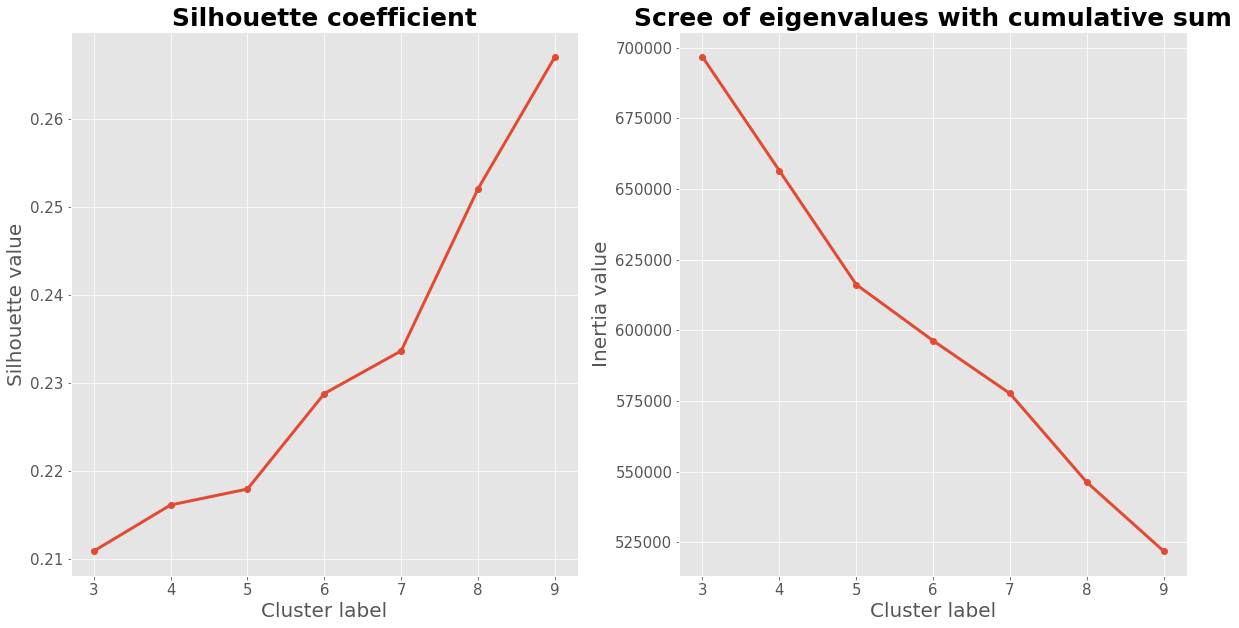

Time: 371.969 seconds


In [261]:
silhouette_inertia(data_cls3)

Il semble pertinent de partitionner les 55,9% de population (cluster 1) en 4. Voyons si cette segmentation supplémentaire peut apporter des infos complémentaires.

In [263]:
kmeans_model(data_cls3, k=4, folder='model/')

Time: 1.27 seconds


KMeans(n_clusters=4)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.213
Time pca plot: 53.366 seconds


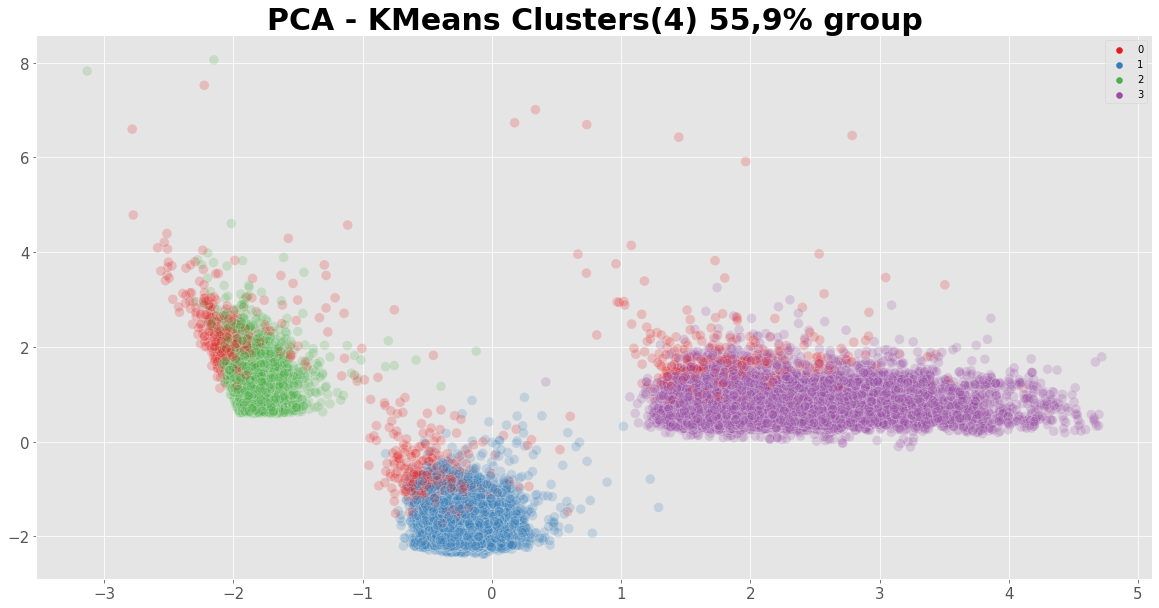

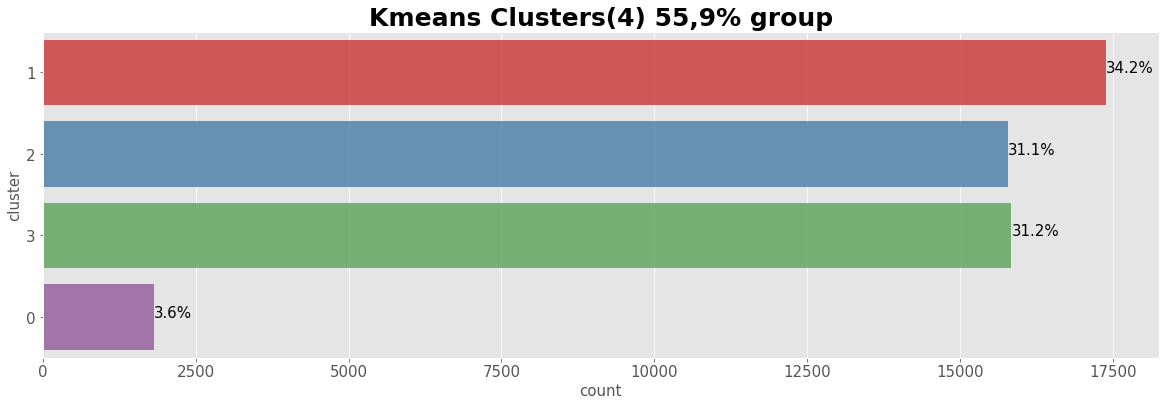

In [262]:
kmeans_clustering_pca(data_cls3, k=4, get_model='KMeans4_data_cls3', get_folder='model/', 
                      add_title='55,9% group')

In [264]:
centroids_cls(data_cls3, get_model='KMeans4_data_cls3', get_folder='model/')[1].T

0         1         2         3
average_basket                0.525043 -0.515477 -0.104263 -0.142923
max_order_amount              0.530285 -0.519851 -0.103876 -0.140687
min_order_amount              0.530285 -0.519851 -0.103876 -0.140687
number_of_products_purchased  0.000000  0.000000  0.000000  0.000000
bucket_quartile_lower25      -0.577120  1.732303 -0.577266  0.338927
bucket_quartile_25_50        -0.579405 -0.579405 -0.579405 -0.579405
bucket_quartile_50_75        -0.576323 -0.576323  1.734606  0.245105
bucket_quartile_upper75       1.734992 -0.576323 -0.576323 -0.003233
payment_boleto               -0.498704 -0.498704 -0.498704 -0.498704
payment_credit_card           0.529501  0.538123  0.514642  0.174125
payment_debit_card           -0.125067 -0.125067 -0.125067 -0.125067
payment_voucher              -0.116024 -0.139213 -0.112791  3.577687
appliances                    0.078099 -0.088472 -0.038529 -0.018869
auto                          0.102529 -0.088742 -0.034037 -0.030279
construction                  0.087635 -0.072253 -0.031159 -0.041252
culture                       0.011348 -0.025056  0.013663 -0.012382
electronics                   0.076454 -0.108563 -0.078998 -0.043574
fashion                       0.134919 -0.147318 -0.073190 -0.045776
food                          0.010643 -0.011428 -0.019793  0.015890
garden                        0.039964 -0.080404 -0.029368 -0.037216
health_beauty                 0.251552 -0.199381 -0.029502 -0.113083
hobbies                       0.005455 -0.041428 -0.035546 -0.039680
home                          0.239996 -0.220043  0.037404  0.044931
office                        0.147357 -0.122026  0.017630 -0.025297
others                        0.146938 -0.121424 -0.015697 -0.016224
pets                          0.034622 -0.065527  0.034871  0.003446
sports_leisure                0.164113 -0.144369  0.011635 -0.014811
toys                          0.124689 -0.105144  0.010839 -0.039470
last_time_order              -0.087370  0.060180 -0.056705  0.343258
number_review_comment        -0.005338  0.015072 -0.006177  0.010369
Recency                      -0.020460 -0.011262 -0.020768  0.124006
Frequency                    -0.105466 -0.106806 -0.115255  3.540979
Monetary                      0.493085 -0.496797 -0.099467 -0.058519
state_MG                      0.120644  0.107485  0.124669  0.111295
state_PR                      0.049495  0.048419  0.050972  0.052342
state_RJ                      0.139141  0.115470  0.140893  0.144353
state_RS                      0.053662  0.044046  0.053216  0.044628
state_SP                      0.353535  0.518284  0.394373  0.417631
state_other                   0.283523  0.166297  0.235876  0.229752

**Cluster 1.0 :** faibles montants d'achats pour ce groupe de clients.

**Cluster 1.1 :** dépenses modérées, des acheteurs aux dépenses moyennes.

**Cluster 1.2 :** clients qui dépensent beaucoup plus que les deux précédents groupes.

**Cluster 1.3 :** une petite niche de clients qui payent uniquement en débit immédiat.

Ce nouveau clustering permet d'identifier des nuances de dépenses, mais aucune distinction sur des préférences d'achat. On peut réellement confirmer que ces acheteurs sont multi-produits, ils portent un intérêt pour des produits de toute sorte.

In [265]:
cluster_count = data_cls(olistbr, get_model='KMeans4_X', get_folder='model/').groupby('cluster').max()
cluster_count['%spent'] = cluster_count['payment_boleto'].apply(lambda x: 100*x/cluster_count['Monetary'].sum())
cluster_count

average_basket  max_order_amount  min_order_amount  \
cluster                                                       
0                4690.0            4690.0            4690.0   
1                6735.0            6735.0            6735.0   
2                4590.0            4590.0            4590.0   
3                4059.0            4059.0            4059.0   

         number_of_products_purchased  bucket_quartile_lower25  \
cluster                                                          
0                                 1.0                      1.0   
1                                 1.0                      1.0   
2                                 1.0                      1.0   
3                                 1.0                      1.0   

         bucket_quartile_25_50  bucket_quartile_50_75  \
cluster                                                 
0                          1.0                    1.0   
1                          1.0                    1.0   
2                          1.0                    1.0   
3                          1.0                    1.0   

         bucket_quartile_upper75  payment_boleto  payment_credit_card  \
cluster                                                                 
0                            1.0             1.0                  2.0   
1                            1.0             1.0                  2.0   
2                            1.0             1.0                  2.0   
3                            1.0             1.0                  2.0   

         payment_debit_card  payment_voucher  appliances     auto  \
cluster                                                             
0                       2.0             21.0     4690.00  2090.00   
1                       1.0             18.0     6735.00  1999.99   
2                       1.0             25.0     3999.00  1999.99   
3                       1.0              8.0     2338.08  2258.00   

         construction  culture  electronics  fashion    food  garden  \
cluster                                                                
0              3099.9   1420.0      4099.99   3700.0  215.56  3930.0   
1              1890.0    524.9      3699.99   2999.0  623.00  2200.0   
2              2160.0    749.0      4590.00   2200.0  699.90  3105.0   
3              1260.0    524.9      3549.00   3999.9  215.56  2690.0   

         health_beauty  hobbies    home   office   others     pets  \
cluster                                                              
0               3899.0  4399.87  2350.0  3089.00  3109.99  1878.33   
1               3124.0  1997.00  1561.0   998.90  2199.00  2498.00   
2               2249.0  2399.00  2110.0  1699.99  2649.00  1690.00   
3               1850.0  1058.00  2110.0   599.00  2649.00  1240.00   

         sports_leisure     toys  last_time_order  number_review_comment  \
cluster                                                                    
0                2999.9  1350.00           8700.0                   13.0   
1                3690.0  1699.99           3682.0                   10.0   
2                1799.0  1499.99           3936.0                   10.0   
3                4059.0  1350.00           3840.0                   10.0   

        customer_state  Recency  Frequency  Monetary    %spent  
cluster                                                         
0                other      696         23  13664.08  0.003122  
1                other      696         17   6929.31  0.003122  
2                other      695         22   7274.88  0.003122  
3                other      695          9   4163.51  0.003122

In [266]:
data_cls3_ca1 = pd.DataFrame(data= [[0, 30.4, 7.84, 7.42, 6.50, 2.07, 8.38, 12.65, 1.62, 7.38, 16.82, 3.47, 20.38, 9.46, 5.78,12.50, 9.04], 
                    [1, 32.8, 5.91, 6.65, 6.16, 1.54, 10.02, 10.75, 0.97, 3.24, 12.38, 3.25, 12.15, 8.65, 4.13, 8.79, 5.44],
                    [2, 35, 4.91, 4.17, 4.06, 1.56, 7.80, 7.76, 1.96, 4.00, 4.58, 3.40, 2.84, 0.79, 1.67, 1.26, 0.50],
                    [3, 1.8, 0.27, 0.32, 0.27, 0.02, 0.35, 0.67, 0.19, 0.25, 0.71, 0.17, 0.77, 0.43, 0.05, 0.46, 0.14]], 
             columns=['Cluster', 'CA(%)', 'appliances', 'auto', 'construction', 'culture',
                      'electronics', 'fashion', 'food', 'garden', 'health_beauty', 'hobbies',
                      'home', 'office', 'pets', 'sports_leisure', 'toys']).set_index('Cluster').T
data_cls3_ca1.columns = ['2.0', '2.1', '2.2', '2.3']
data_cls3_ca1

2.0    2.1    2.2   2.3
CA(%)           30.40  32.80  35.00  1.80
appliances       7.84   5.91   4.91  0.27
auto             7.42   6.65   4.17  0.32
construction     6.50   6.16   4.06  0.27
culture          2.07   1.54   1.56  0.02
electronics      8.38  10.02   7.80  0.35
fashion         12.65  10.75   7.76  0.67
food             1.62   0.97   1.96  0.19
garden           7.38   3.24   4.00  0.25
health_beauty   16.82  12.38   4.58  0.71
hobbies          3.47   3.25   3.40  0.17
home            20.38  12.15   2.84  0.77
office           9.46   8.65   0.79  0.43
pets             5.78   4.13   1.67  0.05
sports_leisure  12.50   8.79   1.26  0.46
toys             9.04   5.44   0.50  0.14

In [267]:
data_cls3_ca2 = pd.DataFrame(data= [[0, 7.55, 30.99, 14.81, 1.40], [1, 1.09, 24.45, 15.98, 1.20],
                    [2, 9.07, 20.07, 17.02, 2.92],[3, 3.09, 9.47, 52.82, 0.89]], 
             columns=['Cluster', 'payment_boleto', 'payment_credit_card', 
                      'payment_debit_card', 'payment_voucher']).set_index('Cluster').T
data_cls3_ca2

Cluster                  0      1      2      3
payment_boleto        7.55   1.09   9.07   3.09
payment_credit_card  30.99  24.45  20.07   9.47
payment_debit_card   14.81  15.98  17.02  52.82
payment_voucher       1.40   1.20   2.92   0.89

## Stabilité temporelle de la segmentation

Notons que la modélisation KMeans reste autant performante sur l'ensemble de la population que sur les 10000 de départ.\
**Testons la stabilité de l'algorithme dans le temps**, puisque la base client dépend directement du temps, elle ne cessera d'augmenter, il est donc nécessaire de démontrer sa stabilité pour les prochains mois, les prochaines années.

In [303]:
X_time = olistbr.copy()
X_time = X_time[X_time.last_time_order > 90]
X_time.shape

(75111, 34)

In [304]:
categorical_columns = X_time.select_dtypes('object').columns
numerical_columns = X_time.drop(columns=categorical_columns).columns
scaler = StandardScaler()
X_time[numerical_columns] = scaler.fit_transform(X_time[numerical_columns])

encoder = OneHotEncoder(sparse=False)

X_categorical = encoder.fit_transform(X_time[categorical_columns])

In [305]:
X_time = pd.merge(X_time[numerical_columns], pd.DataFrame(data = X_categorical, 
                                        columns = encoder.get_feature_names(['state'])).set_index(X_time.index),
                                        left_index = True, right_index = True)

X_time.name = "X_time"
X_time.shape

c:\Python3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(75111, 39)

In [306]:
kmeans_model(X_time, k=4, folder='model/')

Time: 1.997 seconds


KMeans(n_clusters=4)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.147
Time pca plot: 156.716 seconds


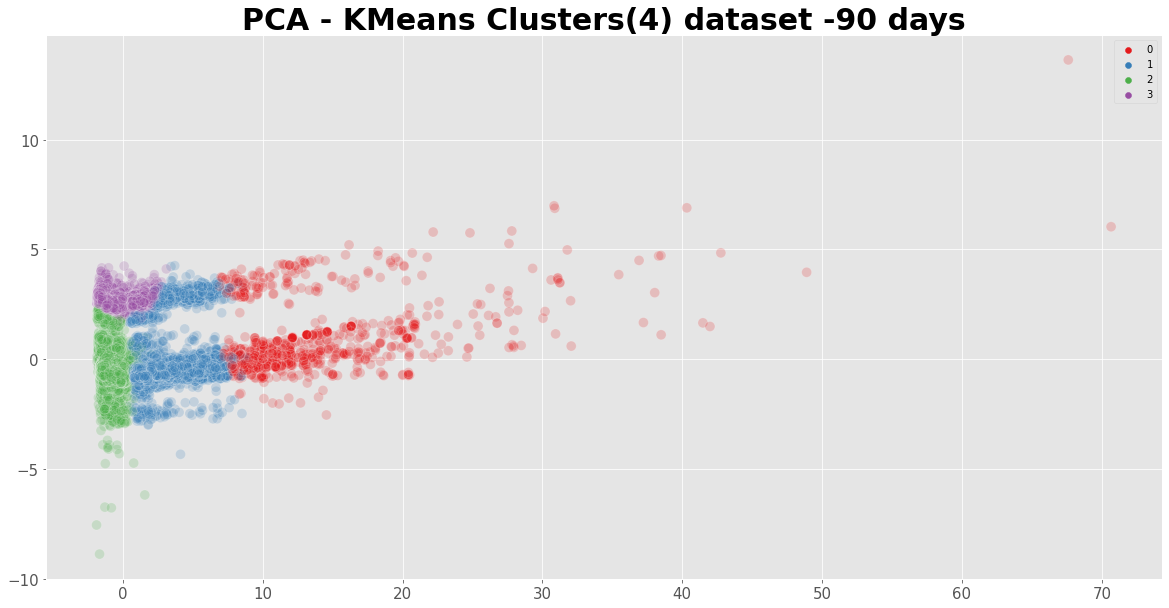

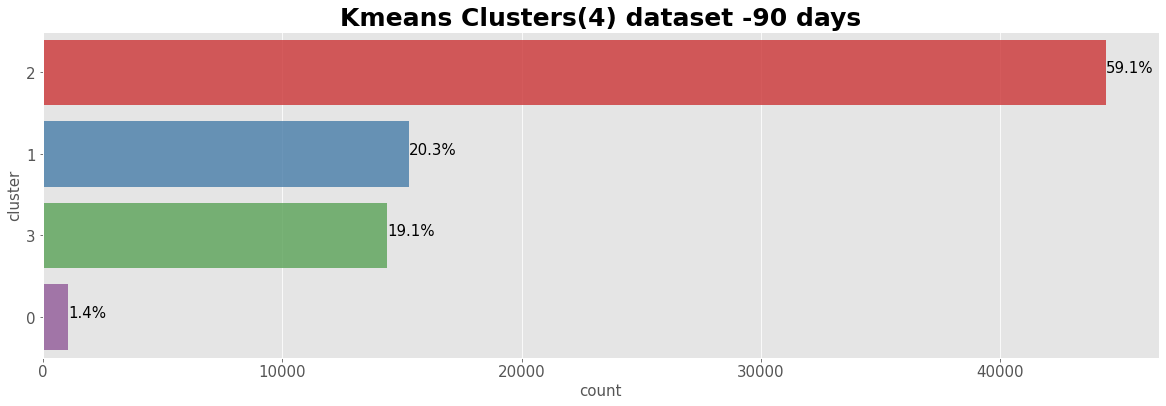

In [307]:
kmeans_clustering_pca(X_time, k=4, get_model='KMeans4_X_time', get_folder='model/', 
                      add_title='dataset -90 days')

La stabilité du clustering en 4 groupes de clients aux profils similaires est satisfaisante dans le temps. Le Kmeans appliqué sur une population tronquée aux plus récentes (-90 jours) retourne des partitions similaires dont le coefficient de silhouette est équivalent.

In [296]:
centroids_cls(X_time, get_model='KMeans4_X_time', get_folder='model/')[1]

average_basket  max_order_amount  min_order_amount  \
0        5.959515          5.973573          5.973573   
1       -0.318009         -0.320639         -0.320639   
2       -0.258100         -0.258287         -0.258287   
3        0.731626          0.738182          0.738182   

   number_of_products_purchased  bucket_quartile_lower25  \
0                           0.0                -0.579672   
1                           0.0                 0.152636   
2                           0.0                 0.182673   
3                           0.0                -0.579520   

   bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
0              -0.582992              -0.573891                 1.745983   
1               0.196882               0.220264                -0.572743   
2               0.067847              -0.002673                -0.249542   
3              -0.581935              -0.573587                 1.744458   

   payment_boleto  payment_credit_card  payment_debit_card  payment_voucher  \
0       -0.139986             0.201861           -0.086326        -0.023357   
1       -0.503841             0.537648           -0.103888        -0.038540   
2        1.707898            -1.821105            0.351800         0.129189   
3       -0.383265             0.403688           -0.074465        -0.026859   

   appliances      auto  construction   culture  electronics   fashion  \
0    1.688708  1.015496      0.917828  0.257997     2.912267  2.293405   
1   -0.055172 -0.067030     -0.052249 -0.007831    -0.101625 -0.111567   
2   -0.052121 -0.051395     -0.041827 -0.005153    -0.048380 -0.099805   
3    0.087007  0.168559      0.124062  0.008641     0.124301  0.251712   

       food    garden  health_beauty   hobbies      home    office    others  \
0 -0.061266  1.359904       1.873958  1.476414  0.677590  0.506457  0.472361   
1 -0.005322 -0.043259      -0.114801 -0.039021 -0.084141 -0.066018 -0.082985   
2 -0.006398 -0.030420      -0.120195 -0.030049 -0.075460 -0.031648 -0.060386   
3  0.026171  0.054552       0.312924  0.033780  0.266669  0.181899  0.262420   

       pets  sports_leisure      toys  last_time_order  number_review_comment  \
0  0.236087        1.265054  0.127449        -0.121258              -0.055826   
1 -0.018722       -0.075697 -0.050994         0.013467               0.003408   
2 -0.025848       -0.054563 -0.062917         0.047346               0.006214   
3  0.062708        0.178059  0.200431        -0.079076              -0.012075   

    Recency  Frequency  Monetary  state_MG  state_PR  state_RJ  state_RS  \
0  0.004282  -0.020947  5.375843  0.113718  0.048736  0.142599  0.056859   
1 -0.015119   0.006109 -0.295444  0.120652  0.049844  0.132223  0.053686   
2  0.052317  -0.007127 -0.234025  0.114852  0.057084  0.113485  0.068451   
3 -0.013250  -0.008077  0.685329  0.119716  0.048518  0.140885  0.054434   

   state_SP  state_other  
0  0.313177     0.324910  
1  0.432998     0.210597  
2  0.415864     0.230263  
3  0.352179     0.284268

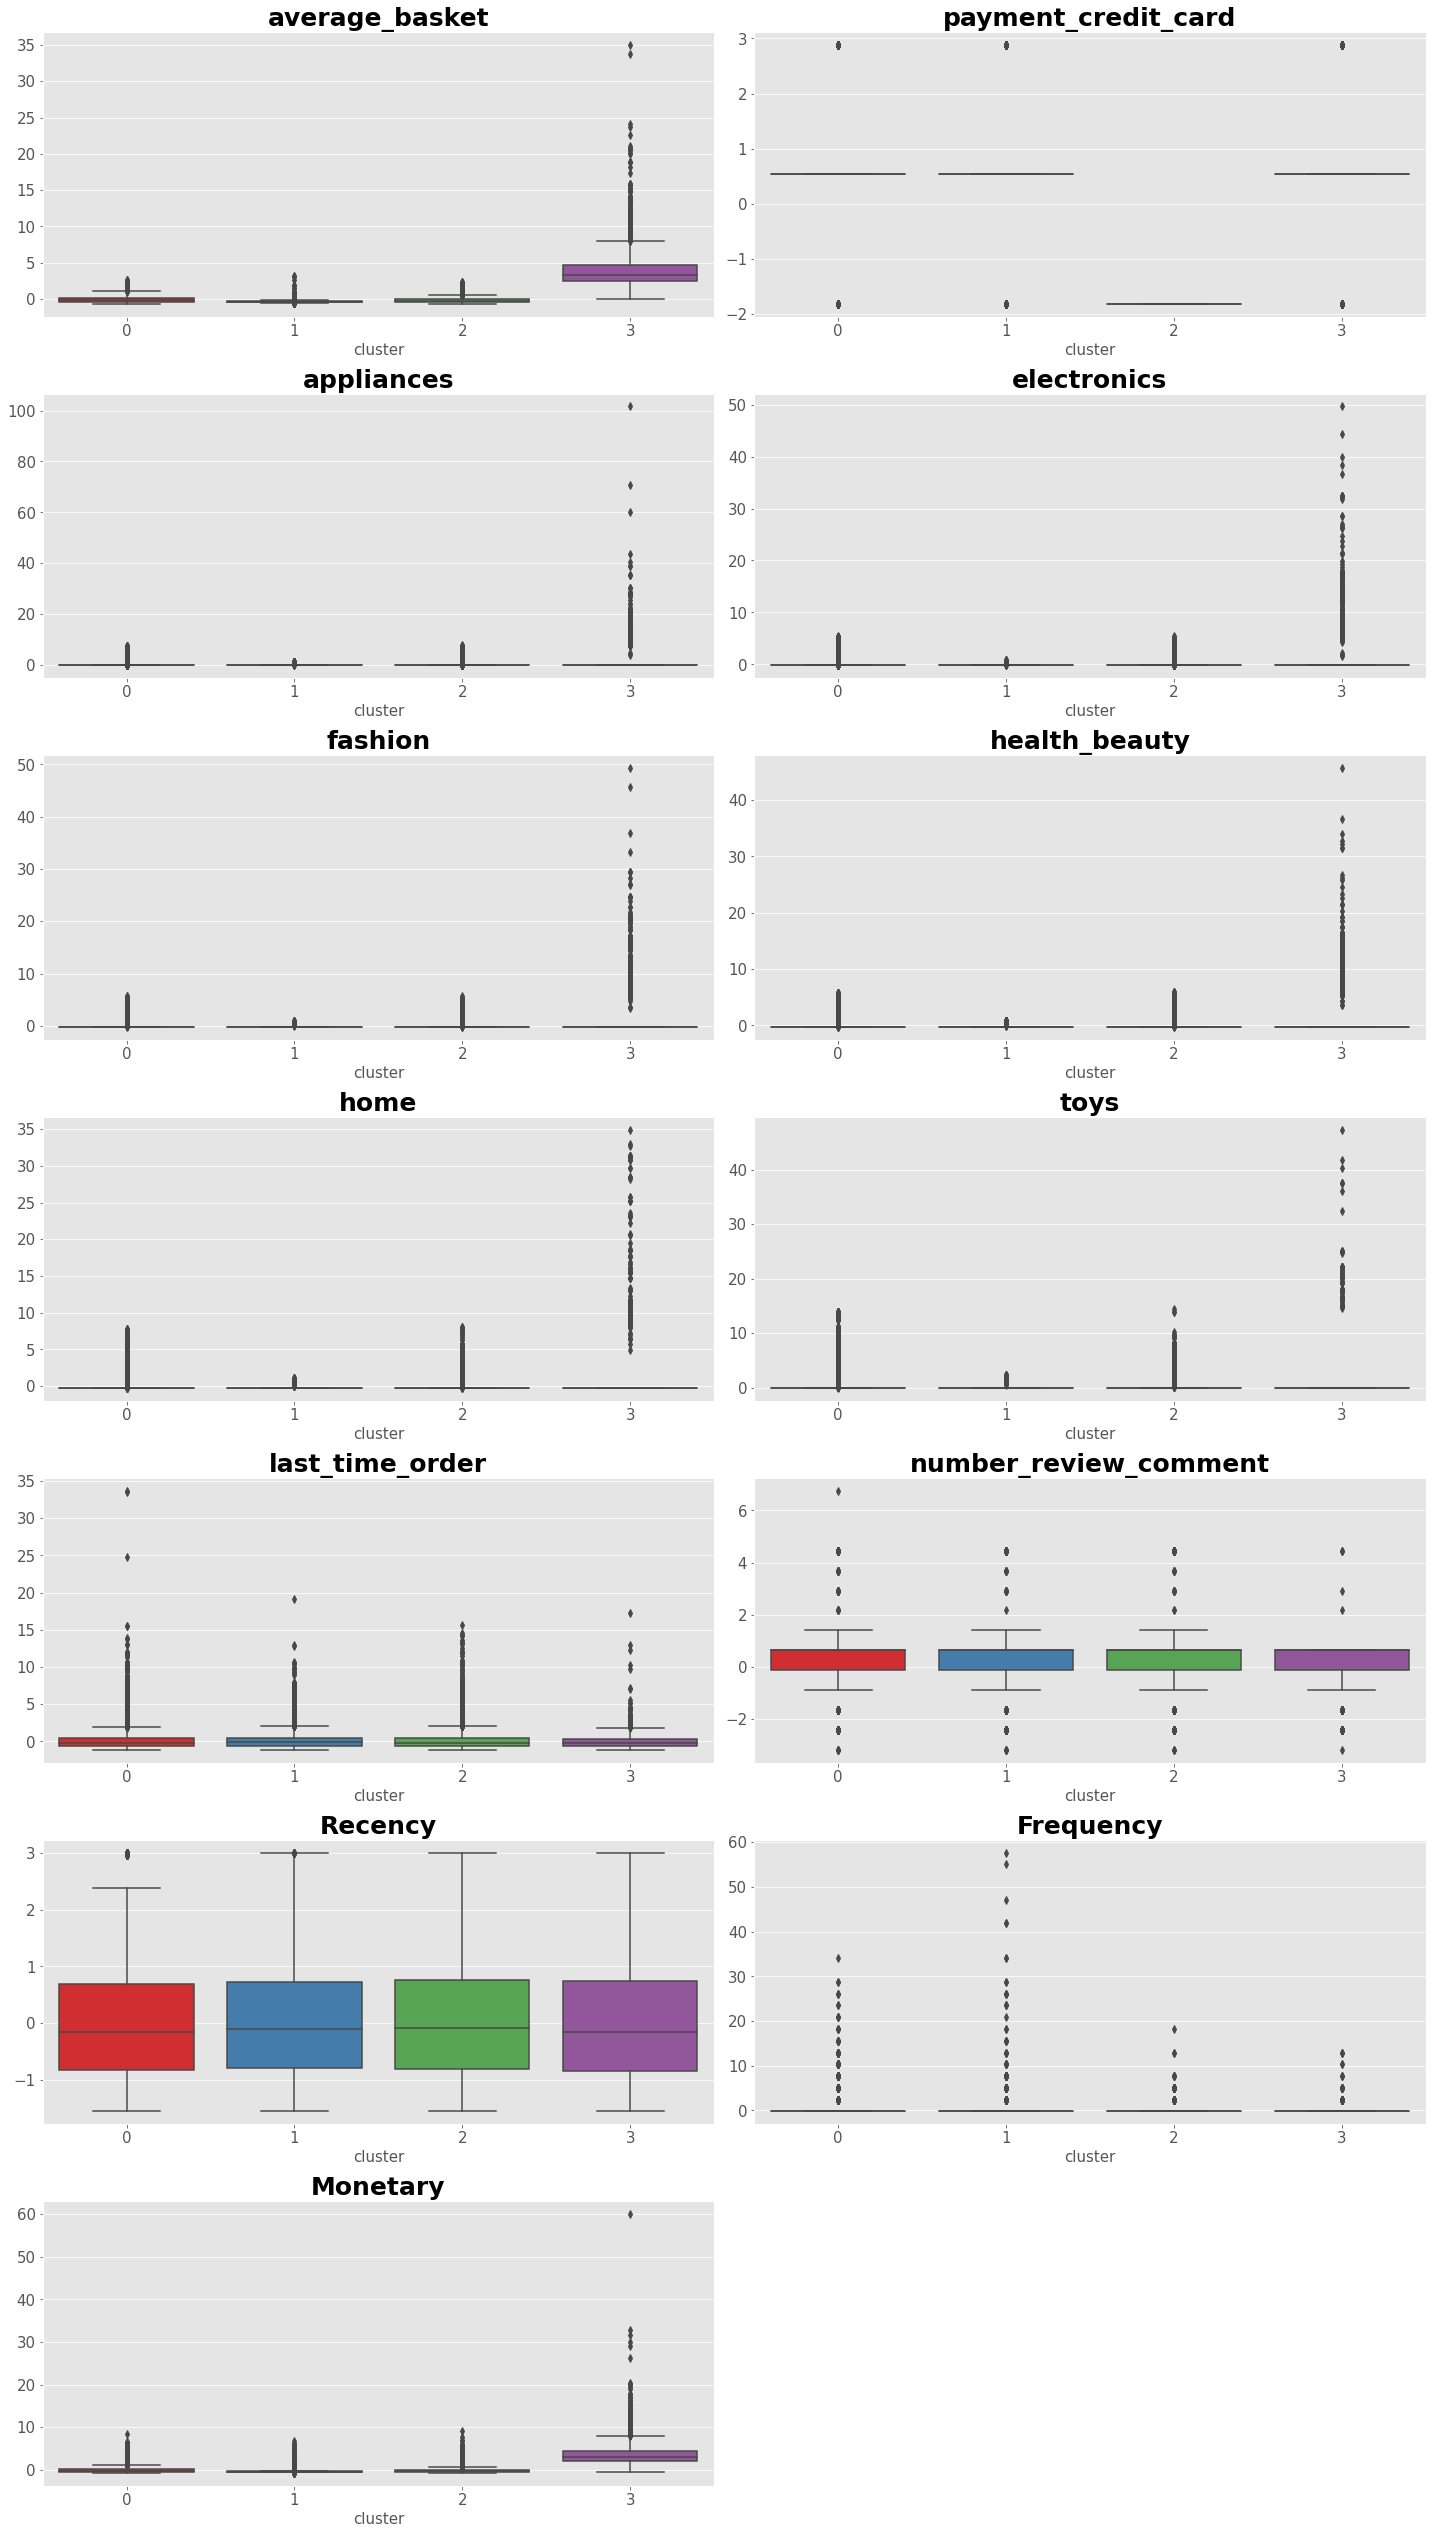

In [297]:
features_kmeans(X, ['average_basket', 'last_time_order', 'payment_credit_card',  
                     'number_review_comment', 'home', 'health_beauty', 'fashion', 'electronics', 'appliances', 'toys', 'Recency', 
                     'Frequency', 'Monetary'] ,

                get_model='KMeans4_X', get_folder='model/')

### 180 g

In [276]:
X_time2 = olistbr.copy()
X_time2 = X_time2[X_time2.last_time_order > 180]
X_time2.shape

(57660, 34)

In [277]:
categorical_columns = X_time2.select_dtypes('object').columns
numerical_columns = X_time2.drop(columns=categorical_columns).columns
scaler = StandardScaler()
X_time2[numerical_columns] = scaler.fit_transform(X_time2[numerical_columns])

encoder = OneHotEncoder(sparse=False)

X_categorical = encoder.fit_transform(X_time2[categorical_columns])

In [278]:
X_time2 = pd.merge(X_time2[numerical_columns], pd.DataFrame(data = X_categorical, 
                                        columns = encoder.get_feature_names(['state'])).set_index(X_time2.index),
                                        left_index = True, right_index = True)

X_time2.name = "X_time"
X_time2.shape

c:\Python3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(57660, 39)

In [279]:
kmeans_model(X_time2, k=4, folder='model/')

Time: 1.185 seconds


KMeans(n_clusters=4)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.139
Time pca plot: 145.75 seconds


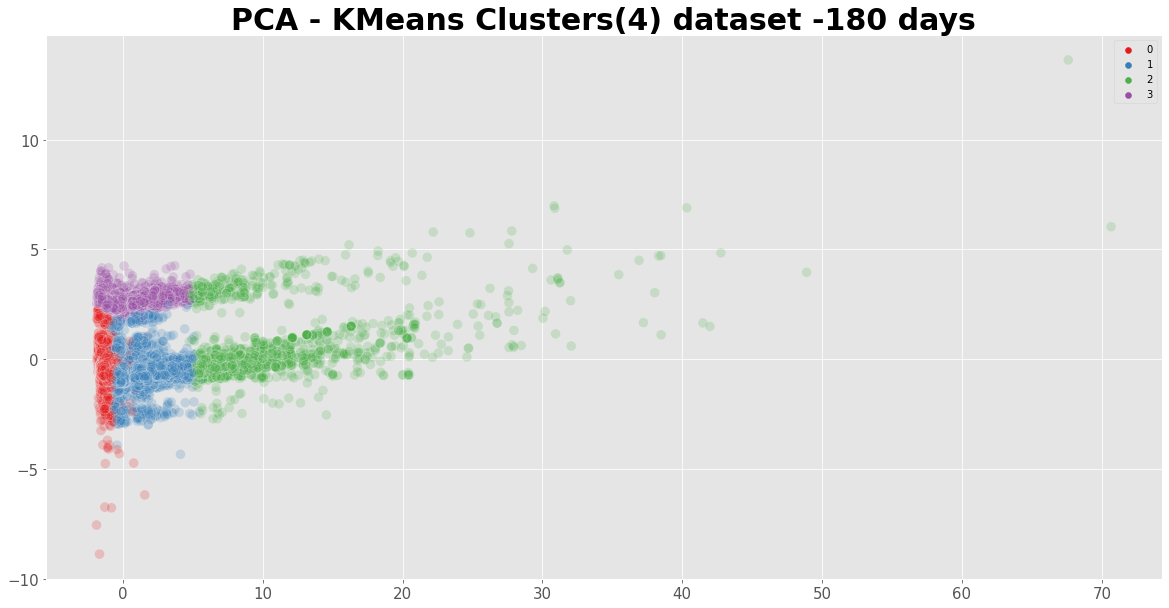

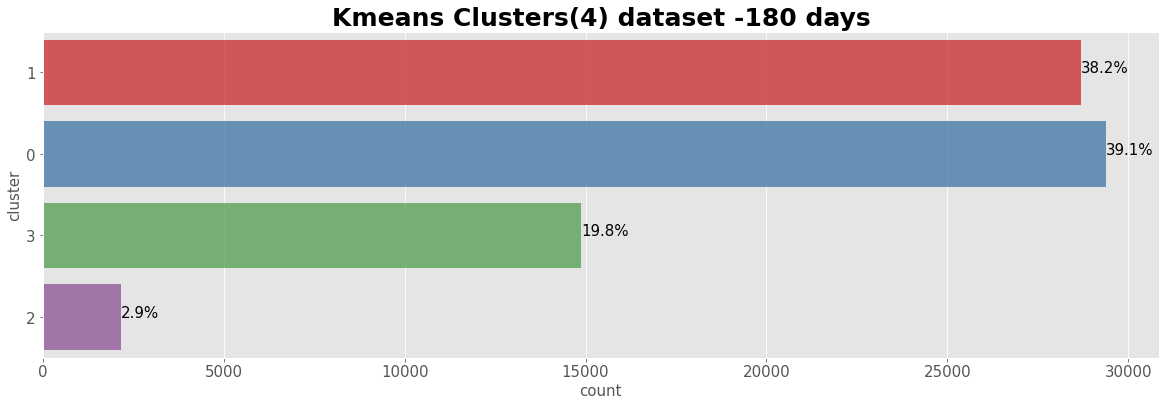

In [280]:
kmeans_clustering_pca(X_time2, k=4, get_model='KMeans4_X_time2', get_folder='model/', 
                      add_title='dataset -180 days')

### Adjusted Rand Index (ARI score)
Vérification de l'ARI score qui permet de mesurer la similitude de nos clusters dans le temps.

L'indice Rand calcule une mesure de similarité entre deux regroupements en considérant toutes les paires d'échantillons et en comptant les paires qui sont attribuées dans le même groupe ou dans des groupes différents dans les regroupements prédits et vrais.

Le score RI brut est ensuite "ajusté pour le hasard" dans le score ARI en utilisant le schéma suivant :

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
L'indice de Rand ajusté est ainsi assuré d'avoir une valeur proche de 0,0 pour un étiquetage aléatoire indépendamment du nombre de clusters et d'échantillons et exactement de 1,0 lorsque les clusterings sont identiques (à une permutation près).

# 90g

In [308]:
pickle.load(open('model/KMeans4_X.pkl', 'rb'))

KMeans(n_clusters=4)

In [ ]:
labels_true = pickle.load(open('model/KMeans4_X.pkl', 'rb')).labels_
model_fit = pickle.load(open('model/KMeans4_X.pkl', 'rb')).fit(X)
labels_pred = model_fit.predict(X)

metrics.adjusted_rand_score(labels_pred, labels_true)

## Discussion sur les résultats et propositions d'amélioration

Le contexte métier permet en effet une modélisation par apprentissage non-supervisé, le clustering KMeans ressort comme étant le plus pertinent, le plus stable dans le temps quelque soit les essais effectués. L'ARI score vient également appuyer l'intuition de stabilité évoquée...  Le modèle KMeans retenu permet d'utiliser un .predict() pour établir un update entre deux fréquences de mise à jour (90 jours) pour prendre en compte les nouveaux clients.

Ceci étant, une combinaison complémentaire par segmentation RFM, permettrait de pouvoir comparer les similarités obtenues par Clustering. Rappelons que le clustering passe par de la réduction dimensionnelle qui, dans notre contexte, n'explique que 30% de la variance, à cela s'ajoute des profils de clients atypiques (Montant d'achat élevé) pouvant biaiser les groupes identifiés. Il peut donc être pertinent de procéder en plus par segmentation RFM pour classer les clients en se basant sur des similarités, en opposition au KMeans qui vise à trouver des similarités au sein des clients pour pouvoir les grouper.